# **Pendahuluan**
Perkembangan teknologi digital dan pesatnya pertumbuhan media sosial telah menciptakan peluang baru dalam dunia pemasaran, salah satunya melalui sistem affiliate marketing. TikTok, sebagai salah satu platform video pendek yang sangat populer, menghadirkan fitur TikTok Affiliate yang memungkinkan kreator konten mempromosikan produk dan memperoleh komisi dari setiap penjualan yang terjadi melalui tautan mereka. Strategi ini dianggap efektif karena mengandalkan kekuatan komunitas dan rekomendasi personal yang dinilai lebih meyakinkan oleh konsumen.

Namun demikian, untuk menilai sejauh mana efektivitas affiliate marketing di TikTok, diperlukan analisis berbasis data. Selain memahami performa penjualan dari sisi kategori dan produk, pelaku usaha juga perlu melihat tren penjualan dari waktu ke waktu. Oleh karena itu, analisis ini tidak hanya mempelajari kinerja affiliate, tetapi juga melakukan peramalan (forecasting) penjualan untuk membantu pengambilan keputusan strategis ke depan. Dua metode time series yang digunakan dalam studi ini adalah Moving Average dan Exponential Smoothing, yang bertujuan untuk menangkap tren penjualan secara kuantitatif.

# **Tujuan**
Penelitian ini bertujuan untuk:

1. Menganalisis kinerja affiliate marketing di TikTok berdasarkan data pendapatan, jumlah penjualan, dan komisi per kategori produk.

2. Mengidentifikasi tren penjualan yang terjadi dari waktu ke waktu menggunakan metode analisis deret waktu (time series).

3. Membandingkan efektivitas metode Moving Average dan Exponential Smoothing dalam melakukan peramalan penjualan.

4. Memberikan rekomendasi berbasis data bagi pelaku usaha atau kreator dalam mengoptimalkan strategi affiliate marketing mereka di TikTok.

# **Metodologi**
Analisis dilakukan melalui beberapa tahapan utama, yaitu:

1. **Data Preprocessing**

* Pembersihan data dilakukan terhadap kolom-kolom penting seperti Harga Produk (IDR), Jumlah Terjual, Total Pendapatan, Komisi (%), dan Total Komisi (IDR).
Deteksi outlier dilakukan menggunakan metode statistik standar untuk memastikan keandalan data.

2. **Exploratory Data Analysis (EDA)**

* Menampilkan statistik deskriptif seperti total, rata-rata, median, nilai minimum, maksimum, dan standar deviasi per kategori produk.Visualisasi data digunakan untuk melihat kontribusi masing-masing kategori terhadap total pendapatan dan penjualan.

3. **Analisis Time Series**

    Data penjualan dikonversi menjadi format deret waktu bulanan.

    Diterapkan dua metode:

  * Moving Average untuk mengamati tren jangka pendek dengan smoothing sederhana.

  * Exponential Smoothing untuk menangkap pola tren dengan memberikan bobot lebih pada data terbaru.

  * Hasil prediksi dibandingkan melalui grafik dan interpretasi visual.



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import plotly.express as px
import plotly.graph_objects as px
import seaborn as sns
import matplotlib.ticker as tick
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from tabulate import tabulate

In [ ]:
df = pd.read_csv("dataset_penjualan_tiktok.csv")
df

,Tanggal Transaksi,Nama Produk,Kategori Produk,Harga Produk (IDR),Jumlah Terjual,Total Pendapatan (IDR),Komisi (%),Total Komisi (IDR),Nama Affiliate,Wilayah Pembeli
0,2024-01-16,Produk 25,Fashion,1903704.40,4,7614817.60,10.58,8.056477e+05,Affiliate C,Medan
1,2024-01-22,Produk 8,Aksesoris,1896828.12,10,18968281.20,14.48,2.746607e+06,Affiliate A,Surabaya
2,2024-01-10,Produk 34,Peralatan Rumah,71582.84,6,429497.04,12.73,5.467497e+04,Affiliate C,Bandung
3,2024-02-21,Produk 13,Kosmetik,377781.73,1,377781.73,5.83,2.202467e+04,Affiliate E,Semarang
4,2024-02-17,Produk 20,Kosmetik,1295125.16,11,14246376.76,16.74,2.384843e+06,Affiliate C,Makassar
...,...,...,...,...,...,...,...,...,...,...
95,2024-01-01,Produk 10,Kosmetik,1624958.14,6,9749748.84,9.17,8.940520e+05,Affiliate B,Jakarta
96,2024-01-26,Produk 7,Aksesoris,1725168.03,7,12076176.21,19.62,2.369346e+06,Affiliate B,Semarang
97,2024-02-24,Produk 4,Elektronik,450901.87,8,3607214.96,14.68,5.295392e+05,Affiliate C,Jakarta
98,2024-02-16,Produk 36,Peralatan Rumah,1956193.84,5,9780969.20,17.22,1.684283e+06,Affiliate C,Makassar


# **DATA PREPROCESSING**

In [ ]:
# Fungsi format Rupiah
def format_rupiah(x):
    try:
        x = int(float(x))
        return f"Rp {x:,}".replace(",", ".")
    except:
        return x

# Konversi tipe data numerik dan waktu
df['Tanggal Transaksi'] = pd.to_datetime(df['Tanggal Transaksi'])
df['Jumlah Terjual'] = pd.to_numeric(df['Jumlah Terjual'], errors='coerce')
df['Total Pendapatan (IDR)'] = pd.to_numeric(df['Total Pendapatan (IDR)'], errors='coerce')
df['Harga Produk (IDR)'] = pd.to_numeric(df['Harga Produk (IDR)'], errors='coerce')
df['Komisi (%)'] = pd.to_numeric(df['Komisi (%)'], errors='coerce')
df = df[df['Total Pendapatan (IDR)'] != 0]

# Format fungsi ke jutaan
def jutaan(x, pos):
    return f'Rp {int(x/1_000_000):,} jt'.replace(",", ".")

# Create price vs sales data
price_vs_sales = df[['Harga Produk (IDR)', 'Jumlah Terjual']].dropna()
# Hitung Komisi (%) baru
df['Komisi (%)'] = (df['Total Komisi (IDR)'] / df['Total Pendapatan (IDR)']) * 100




In [ ]:
numerical_features = ['Harga Produk (IDR)', 'Jumlah Terjual', 'Total Pendapatan (IDR)', 'Komisi (%)', 'Total Komisi (IDR)']

# Detect outliers using IQR for each numerical feature
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    print(f'Feature: {feature}')
    print(f'Number of Outliers: {outliers.shape[0]}')
    print(outliers[[feature]])

Feature: Harga Produk (IDR)
Number of Outliers: 0
Empty DataFrame
Columns: [Harga Produk (IDR)]
Index: []
Feature: Jumlah Terjual
Number of Outliers: 0
Empty DataFrame
Columns: [Jumlah Terjual]
Index: []
Feature: Total Pendapatan (IDR)
Number of Outliers: 1
    Total Pendapatan (IDR)
30              34461626.2
Feature: Komisi (%)
Number of Outliers: 0
Empty DataFrame
Columns: [Komisi (%)]
Index: []
Feature: Total Komisi (IDR)
Number of Outliers: 3
    Total Komisi (IDR)
30        5.120998e+06
42        3.826840e+06
77        5.857082e+06


# **Exploratory Data Analysis (EDA)**


In [ ]:
#analisis

# 1. Top Products by Sales Volume
top_sales = df.groupby('Nama Produk')['Jumlah Terjual'].sum().sort_values(ascending=False).head(10).reset_index()

# 2. Top Products by Revenue
top_revenue = df.groupby('Nama Produk')['Total Pendapatan (IDR)'].sum().sort_values(ascending=False).head(10)
top_revenue_formatted = top_revenue.apply(format_rupiah).reset_index()

# 3. Revenue by Category
category_revenue = df.groupby('Kategori Produk')['Total Pendapatan (IDR)'].sum().sort_values(ascending=False)
category_revenue_formatted = category_revenue.apply(format_rupiah).reset_index()

# 4. Monthly Sales Analysis
df['Year-Month'] = df['Tanggal Transaksi'].dt.to_period('M')
monthly_trend = df.groupby('Year-Month')['Total Pendapatan (IDR)'].sum().to_timestamp()
monthly_trend_formatted = monthly_trend.apply(format_rupiah).reset_index()

# Monthly Sales by Category
monthly_by_category = df.groupby(['Year-Month', 'Kategori Produk'])['Total Pendapatan (IDR)'].sum().reset_index()
monthly_pivot = monthly_by_category.pivot(index='Year-Month', columns='Kategori Produk', values='Total Pendapatan (IDR)').fillna(0)
monthly_pivot_formatted = monthly_pivot.applymap(format_rupiah).reset_index()

# 5. Affiliate Analysis
top_affiliates = df.groupby('Nama Affiliate')['Total Komisi (IDR)'].sum().sort_values(ascending=False).head(10)
top_affiliates_formatted = top_affiliates.apply(format_rupiah).reset_index()

affiliate_effectiveness = df.groupby('Nama Affiliate').agg({
    'Komisi (%)': 'mean',
    'Total Pendapatan (IDR)': 'sum',
    'Jumlah Terjual': 'sum'
}).round(2)
affiliate_effectiveness['Total Pendapatan (IDR)'] = affiliate_effectiveness['Total Pendapatan (IDR)'].apply(format_rupiah)
affiliate_effectiveness = affiliate_effectiveness.reset_index()

# 6. Regional Analysis
commission_by_region = df.groupby('Wilayah Pembeli')['Total Komisi (IDR)'].sum().sort_values(ascending=False)
commission_by_region_formatted = commission_by_region.apply(format_rupiah).reset_index()
sales_by_region = df.groupby('Wilayah Pembeli')['Jumlah Terjual'].sum().sort_values(ascending=False).reset_index()
revenue_by_region = df.groupby('Wilayah Pembeli')['Total Pendapatan (IDR)'].sum().sort_values(ascending=False)
revenue_by_region_formatted = revenue_by_region.apply(format_rupiah).reset_index()

# 7. Price Analysis
avg_price_category = df.groupby('Kategori Produk')['Harga Produk (IDR)'].mean()
avg_price_category_formatted = avg_price_category.apply(format_rupiah).reset_index()

# 8. Growth Analysis
monthly_total = df.groupby('Year-Month').agg({
    'Total Pendapatan (IDR)': 'sum',
    'Jumlah Terjual': 'sum',
    'Total Komisi (IDR)': 'sum'
}).reset_index()

monthly_total_sorted = monthly_total.sort_values('Year-Month')
monthly_total_sorted['Revenue_Growth'] = monthly_total_sorted['Total Pendapatan (IDR)'].pct_change() * 100
monthly_total_sorted['Units_Growth'] = monthly_total_sorted['Jumlah Terjual'].pct_change() * 100

growth_analysis = monthly_total_sorted[['Year-Month', 'Total Pendapatan (IDR)', 'Revenue_Growth',
                                      'Jumlah Terjual', 'Units_Growth']].round(2)
growth_analysis['Total Pendapatan (IDR)'] = growth_analysis['Total Pendapatan (IDR)'].apply(format_rupiah)

summary_df = df.groupby('Kategori Produk')['Jumlah Terjual'].sum().reset_index()
summary_df = summary_df.rename(columns={'Jumlah Terjual': 'Total Penjualan'})
revenue_region = df.groupby('Wilayah Pembeli')['Total Pendapatan (IDR)'].sum().sort_values(ascending=False)
avg_price = df.groupby('Kategori Produk')['Harga Produk (IDR)'].mean().sort_values(ascending=False)



<ipython-input-37-57b767fc4186>:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  monthly_pivot_formatted = monthly_pivot.applymap(format_rupiah).reset_index()


In [ ]:

# Fungsi format Rupiah (titik ribuan, koma desimal)
def format_rupiah(x):
    if pd.isna(x):
        return ""
    return "Rp {:,.2f}".format(x).replace(',', 'X').replace('.', ',').replace('X', '.')

# Konversi kolom tanggal ke datetime
df['Tanggal Transaksi'] = pd.to_datetime(df['Tanggal Transaksi'])

# Ekstrak bulan dan tahun untuk grouping
df['Year-Month'] = df['Tanggal Transaksi'].dt.to_period('M')

# 1. Monthly Sales Total (Semua Kategori)
monthly_total = df.groupby('Year-Month').agg({
    'Total Pendapatan (IDR)': 'sum',
    'Jumlah Terjual': 'sum',
    'Total Komisi (IDR)': 'sum'
}).reset_index()

# Konversi Year-Month kembali ke datetime untuk plotting (tidak perlu format)
monthly_total['Date'] = monthly_total['Year-Month'].dt.start_time

# Format rupiah di monthly_total
monthly_total['Total Pendapatan (IDR)'] = monthly_total['Total Pendapatan (IDR)'].apply(format_rupiah)
monthly_total['Total Komisi (IDR)'] = monthly_total['Total Komisi (IDR)'].apply(format_rupiah)

#  SUMMARY STATISTIK PER KATEGORI
print("===  SUMMARY STATISTIK PER KATEGORI ===")

summary_stats = []
categories = df['Kategori Produk'].unique()

for category in categories:
    cat_data = df[df['Kategori Produk'] == category]

    stats = {
        'Kategori': category,
        'Total Pendapatan (IDR)': cat_data['Total Pendapatan (IDR)'].sum(),
        'Rata-rata Pendapatan (IDR)': cat_data['Total Pendapatan (IDR)'].mean(),
        'Median Pendapatan (IDR)': cat_data['Total Pendapatan (IDR)'].median(),
        'Std Dev Pendapatan (IDR)': cat_data['Total Pendapatan (IDR)'].std(),
        'Min Pendapatan (IDR)': cat_data['Total Pendapatan (IDR)'].min(),
        'Max Pendapatan (IDR)': cat_data['Total Pendapatan (IDR)'].max(),

        'Total Jumlah Terjual': cat_data['Jumlah Terjual'].sum(),
        'Rata-rata Jumlah Terjual': cat_data['Jumlah Terjual'].mean(),
        'Median Jumlah Terjual': cat_data['Jumlah Terjual'].median(),
        'Std Dev Jumlah Terjual': cat_data['Jumlah Terjual'].std(),
        'Min Jumlah Terjual': cat_data['Jumlah Terjual'].min(),
        'Max Jumlah Terjual': cat_data['Jumlah Terjual'].max(),
    }
    summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)

# Format kolom Rupiah di summary_df
cols_rupiah = ['Total Pendapatan (IDR)', 'Rata-rata Pendapatan (IDR)', 'Median Pendapatan (IDR)',
               'Std Dev Pendapatan (IDR)', 'Min Pendapatan (IDR)', 'Max Pendapatan (IDR)']

for col in cols_rupiah:
    summary_df[col] = summary_df[col].apply(format_rupiah)

print(tabulate(summary_df.round(2), headers='keys', tablefmt='grid', showindex=False))
print()


=== 📊 SUMMARY STATISTIK PER KATEGORI ===
+-------------------+--------------------------+------------------------------+---------------------------+----------------------------+------------------------+------------------------+------------------------+----------------------------+-------------------------+--------------------------+----------------------+----------------------+
| Kategori          | Total Pendapatan (IDR)   | Rata-rata Pendapatan (IDR)   | Median Pendapatan (IDR)   | Std Dev Pendapatan (IDR)   | Min Pendapatan (IDR)   | Max Pendapatan (IDR)   |   Total Jumlah Terjual |   Rata-rata Jumlah Terjual |   Median Jumlah Terjual |   Std Dev Jumlah Terjual |   Min Jumlah Terjual |   Max Jumlah Terjual |
+===================+==========================+==============================+===========================+============================+========================+========================+========================+============================+=========================+=============

##**Analisis Statistik Penjualan per Kategori Produk**
Tabel di atas menyajikan ringkasan statistik deskriptif untuk masing-masing kategori produk berdasarkan total pendapatan dan jumlah produk terjual. Analisis ini memberikan gambaran menyeluruh mengenai performa tiap kategori yang dijual di TikTok Shop.

###🔍 **Key Insight dan Interpretasi**
1. **Kategori dengan Pendapatan Tertinggi**
Kosmetik menjadi kategori dengan total pendapatan tertinggi sebesar Rp 212.509.623,94, disusul oleh Peralatan Rumah sebesar Rp 198.096.602,48.
Pendapatan rata-rata per transaksi tertinggi juga dimiliki oleh kategori Kosmetik dengan Rp 10.625.481,20, menunjukkan potensi margin keuntungan yang tinggi.

2. **Kategori Terlaris Berdasarkan Jumlah Unit Terjual:**
Kosmetik kembali unggul dengan total 206 unit terjual, menjadikannya kategori dengan volume transaksi terbanyak.
Disusul oleh Peralatan Rumah (183 unit) dan Fashion (168 unit), yang menunjukkan permintaan tinggi di pasar.

3. **Stabilitas dan Konsistensi Penjualan:**
Kategori Peralatan Rumah memiliki nilai standar deviasi (Std Dev) pendapatan terendah (Rp 6.818.122,78), mengindikasikan penjualan yang lebih stabil dan tidak terlalu fluktuatif dibanding kategori lain.
Sebaliknya, kategori Elektronik memiliki standar deviasi yang tinggi (Rp 7.984.243,81) dan nilai minimum sangat rendah (Rp 121.062,91), mencerminkan ketidakstabilan dan adanya ketimpangan performa antar produk.

4. **Kategori dengan Variasi Produk Tinggi:**
Aksesoris dan Fashion menunjukkan nilai median pendapatan yang cukup jauh dari nilai maksimumnya. Hal ini mengindikasikan terdapat beberapa produk unggulan yang sangat laku, tetapi sebagian besar produk memiliki performa penjualan yang lebih rendah.

5. **Kategori Potensial Berdasarkan Volume:**
Makanan & Minuman memiliki rata-rata jumlah terjual tertinggi (12,6 unit) dan median 14 unit, meskipun pendapatannya relatif rendah (Rp 90.452.401,52). Ini menunjukkan produk-produk pada kategori ini bersifat frekuentif dan memiliki harga satuan yang lebih rendah.

##💡 **Rekomendasi Strategis**

1. **Prioritaskan Kategori Kosmetik dan Peralatan Rumah:**
Fokuskan strategi promosi dan pengembangan produk pada kategori Kosmetik dan Peralatan Rumah, karena keduanya menunjukkan performa tinggi baik dari sisi pendapatan maupun volume penjualan.

2. **Optimalkan Produk Potensial di Kategori Aksesoris dan Elektronik:**
Perlu dilakukan evaluasi dan seleksi produk unggulan dalam kategori ini agar dapat mengurangi ketimpangan performa penjualan.

3. **Segmen Makanan & Minuman Cocok untuk Strategi Volume Sales:**
Walaupun margin per produk lebih kecil, tingginya frekuensi pembelian dapat dimanfaatkan dengan strategi bundling atau promosi pembelian berulang (repeat purchase).

4. **Perlu Intervensi pada Kategori Fashion dan Elektronik:**
Rendahnya median pendapatan dan tingginya standar deviasi pada kedua kategori ini menunjukkan perlunya peningkatan kualitas produk, visualisasi konten, dan strategi pemasaran.



## **Visualisasi**

<ipython-input-38-5ce7296fe2bf>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0], x=top_sales['Jumlah Terjual'], y=top_sales['Nama Produk'], palette='Blues_d')
<ipython-input-38-5ce7296fe2bf>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[1], x=top_revenue.values, y=top_revenue.index, palette='Greens_d')
<ipython-input-38-5ce7296fe2bf>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[2], x=category_revenue.values, y=category_revenue.index, palette='Purples_d')
<ipython-input-38-5ce7296fe2bf>:58: FutureWarning: 



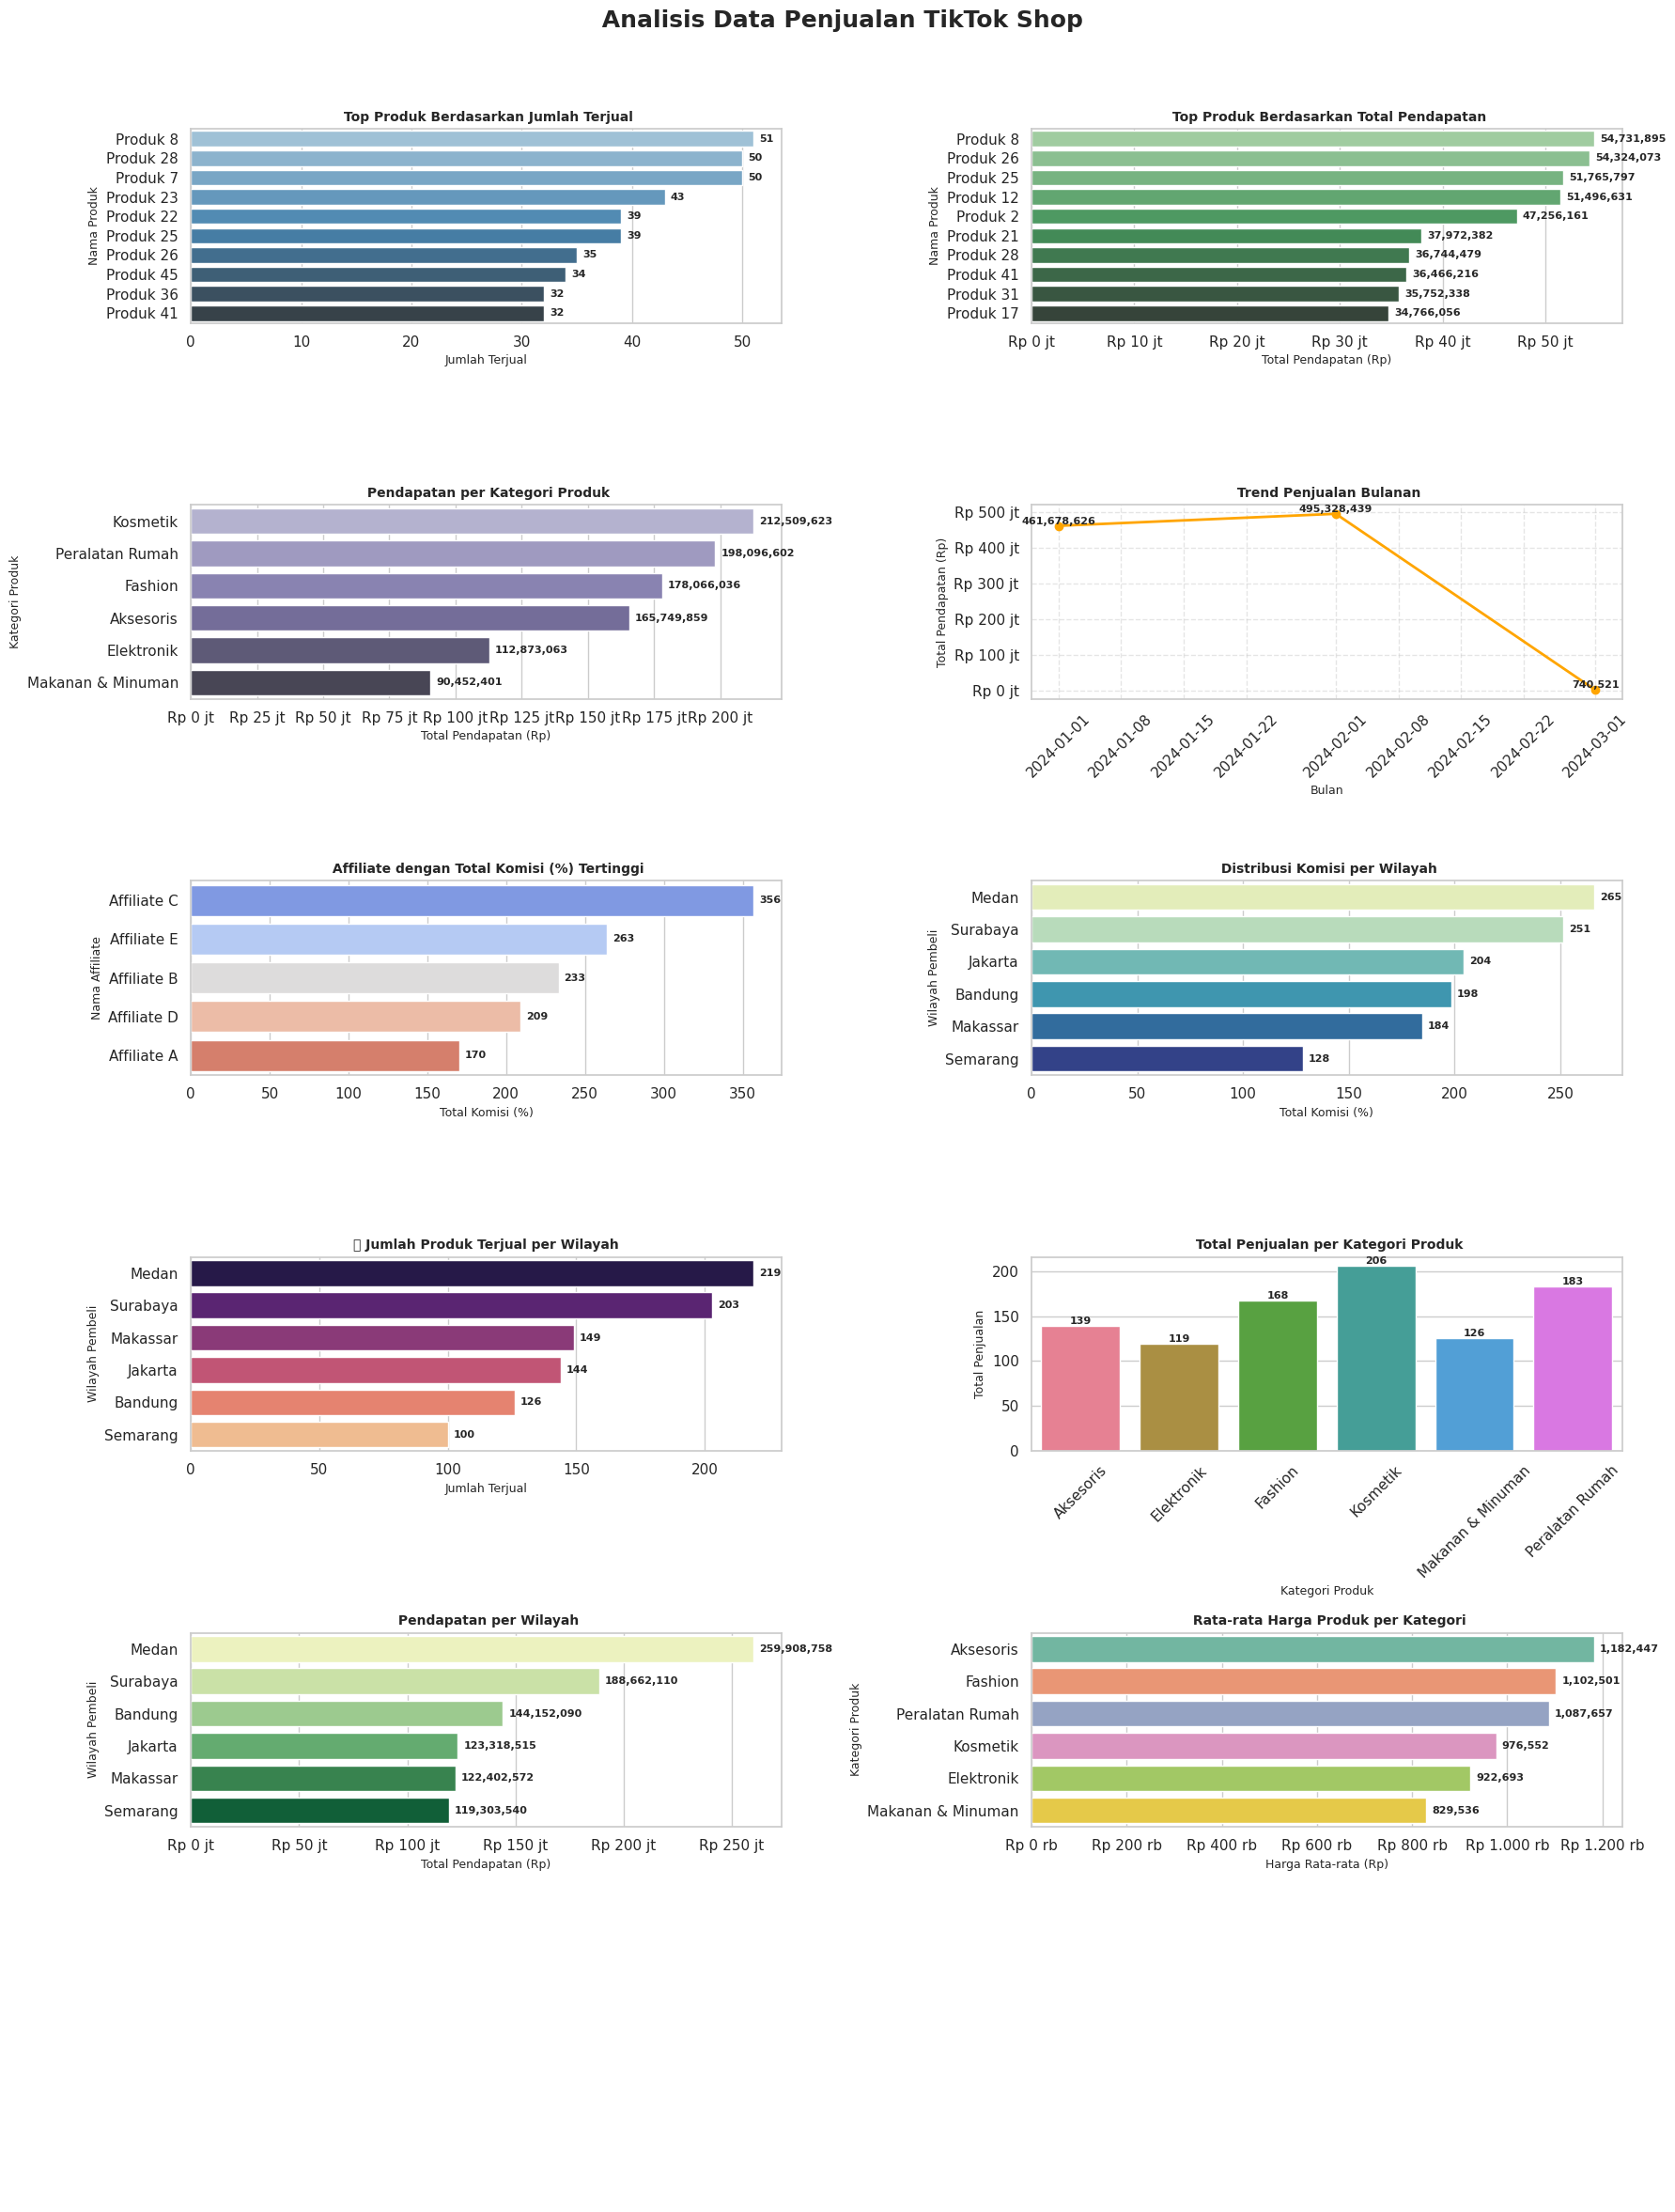

In [ ]:


# Formatter jutaan
def jutaan(x, pos):
    return f'Rp {int(x / 1_000_000):,} jt'.replace(',', '.')

# Formatter ribuan
def ribuan(x, pos):
    return f'Rp {int(x / 1_000):,} rb'.replace(',', '.')

# Fungsi untuk menambahkan label
def add_bar_label(ax, values):
    for i, v in enumerate(values):
        ax.text(v + max(values) * 0.01, i, f'{int(v):,}', va='center', fontweight='bold', fontsize=8)

# Set gaya
sns.set(style='whitegrid')
plt.rcParams.update({'axes.titlesize': 10, 'axes.labelsize': 9})

# Setup canvas (6 baris x 2 kolom)
fig, axs = plt.subplots(6, 2, figsize=(18, 24))
fig.suptitle(" Analisis Data Penjualan TikTok Shop", fontsize=18, fontweight='bold')
fig.subplots_adjust(hspace=0.6, wspace=0.3)

# Mulai plot
axs = axs.flatten()  # Untuk memudahkan indexing satu dimensi

# 1. Top Produk Berdasarkan Jumlah Terjual
sns.barplot(ax=axs[0], x=top_sales['Jumlah Terjual'], y=top_sales['Nama Produk'], palette='Blues_d')
axs[0].set_title(" Top Produk Berdasarkan Jumlah Terjual", fontweight='bold')
axs[0].set_xlabel("Jumlah Terjual")
add_bar_label(axs[0], top_sales['Jumlah Terjual'].values)

# 2. Top Produk Berdasarkan Total Pendapatan
sns.barplot(ax=axs[1], x=top_revenue.values, y=top_revenue.index, palette='Greens_d')
axs[1].set_title(" Top Produk Berdasarkan Total Pendapatan", fontweight='bold')
axs[1].set_xlabel("Total Pendapatan (Rp)")
axs[1].xaxis.set_major_formatter(tick.FuncFormatter(jutaan))
add_bar_label(axs[1], top_revenue.values)

# 3. Pendapatan per Kategori Produk
sns.barplot(ax=axs[2], x=category_revenue.values, y=category_revenue.index, palette='Purples_d')
axs[2].set_title(" Pendapatan per Kategori Produk", fontweight='bold')
axs[2].set_xlabel("Total Pendapatan (Rp)")
axs[2].xaxis.set_major_formatter(tick.FuncFormatter(jutaan))
add_bar_label(axs[2], category_revenue.values)

# 4. Trend Penjualan Bulanan
axs[3].plot(monthly_trend.index, monthly_trend.values, marker='o', linestyle='-', color='orange', linewidth=2)
axs[3].set_title(" Trend Penjualan Bulanan", fontweight='bold')
axs[3].set_xlabel("Bulan")
axs[3].set_ylabel("Total Pendapatan (Rp)")
axs[3].tick_params(axis='x', rotation=45)
axs[3].yaxis.set_major_formatter(tick.FuncFormatter(jutaan))
axs[3].grid(True, linestyle='--', alpha=0.5)
for x, y in zip(monthly_trend.index, monthly_trend.values):
    axs[3].text(x, y + max(monthly_trend.values) * 0.01, f'{int(y):,}', ha='center', fontsize=8, fontweight='bold')

# 5. Affiliate dengan Komisi Tertinggi
sns.barplot(ax=axs[4], x=top_affiliates_pct.values, y=top_affiliates_pct.index, palette='coolwarm')
axs[4].set_title(" Affiliate dengan Total Komisi (%) Tertinggi", fontweight='bold')
axs[4].set_xlabel("Total Komisi (%)")
add_bar_label(axs[4], top_affiliates_pct.values)

# 6. Distribusi Komisi per Wilayah
sns.barplot(ax=axs[5], x=commission_pct_by_region.values, y=commission_pct_by_region.index, palette='YlGnBu')
axs[5].set_title(" Distribusi Komisi per Wilayah", fontweight='bold')
axs[5].set_xlabel("Total Komisi (%)")
add_bar_label(axs[5], commission_pct_by_region.values)

# 7. Penjualan per Wilayah
sns.barplot(ax=axs[6], x=sales_by_region['Jumlah Terjual'], y=sales_by_region['Wilayah Pembeli'], palette='magma')
axs[6].set_title("📍 Jumlah Produk Terjual per Wilayah", fontweight='bold')
axs[6].set_xlabel("Jumlah Terjual")
add_bar_label(axs[6], sales_by_region['Jumlah Terjual'].values)

# 8. Total Penjualan per Kategori Produk
sns.barplot(ax=axs[7], x=summary_df['Kategori Produk'], y=summary_df['Total Penjualan'], palette='husl')
axs[7].set_title(" Total Penjualan per Kategori Produk", fontweight='bold')
axs[7].set_xlabel("Kategori Produk")
axs[7].set_ylabel("Total Penjualan")
axs[7].tick_params(axis='x', rotation=45)
for i, v in enumerate(summary_df['Total Penjualan']):
    axs[7].text(i, v + max(summary_df['Total Penjualan']) * 0.01, f'{int(v):,}', ha='center', fontweight='bold', fontsize=8)

# 9. Pendapatan per Wilayah
sns.barplot(ax=axs[8], x=revenue_region.values, y=revenue_region.index, palette='YlGn')
axs[8].set_title(" Pendapatan per Wilayah", fontweight='bold')
axs[8].set_xlabel("Total Pendapatan (Rp)")
axs[8].xaxis.set_major_formatter(tick.FuncFormatter(jutaan))
add_bar_label(axs[8], revenue_region.values)

# 10. Rata-rata Harga Produk per Kategori
sns.barplot(ax=axs[9], x=avg_price.values, y=avg_price.index, palette='Set2')
axs[9].set_title(" Rata-rata Harga Produk per Kategori", fontweight='bold')
axs[9].set_xlabel("Harga Rata-rata (Rp)")
axs[9].xaxis.set_major_formatter(tick.FuncFormatter(ribuan))
add_bar_label(axs[9], avg_price.values)

# Kosongkan slot terakhir jika tidak digunakan
axs[10].axis('off')
axs[11].axis('off')

# Tampilkan hasil
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## **🔍 Insight  Analisis Penjualan TikTok Shop**

1. **Top Produk Berdasarkan Jumlah Terjual & Total Pendapatan**
* Produk 8 mendominasi baik dari segi jumlah terjual tertinggi (52 unit) maupun total pendapatan tertinggi (Rp 51 juta+).

* Produk seperti Produk 26 dan Produk 5 juga memberikan kontribusi pendapatan signifikan meskipun jumlah terjualnya tidak tertinggi. Ini menunjukkan bahwa harga produk berperan besar dalam memengaruhi pendapatan, meski tidak selalu berkorelasi langsung dengan jumlah unit terjual.

2. **Pendapatan per Kategori Produk**
* Kosmetik menempati posisi teratas sebagai kategori dengan pendapatan tertinggi, yaitu sekitar Rp 221 juta. Diikuti oleh Peralatan Rumah dan Fashion, masing-masing menyumbang lebih dari Rp 100 juta. Kategori Makanan & Minuman dan Elektronik berada di posisi bawah dalam hal pendapatan.

3. **Trend Penjualan Bulanan**
Penjualan tertinggi tercatat pada bulan Januari 2024, dengan penurunan signifikan di bulan-bulan berikutnya.

* Ini mengindikasikan adanya potensi musiman atau kampanye promosi besar yang hanya aktif di awal tahun. Perlu strategi promosi berkelanjutan untuk menjaga konsistensi penjualan bulanan.

4. **Affiliate dengan Komisi Tertinggi**
* Affiliate C memperoleh komisi tertinggi (256 poin), menunjukkan performa unggul dalam memengaruhi pembelian. Hal ini dapat menjadi dasar evaluasi untuk mempertahankan atau memperluas kerja sama dengan affiliate yang berkontribusi tinggi.

5. **Distribusi Komisi per Wilayah**
* Wilayah dengan distribusi komisi tertinggi adalah Medan dan Surabaya, yang juga merupakan wilayah dengan jumlah penjualan tinggi.

* Wilayah seperti Semarang dan Makassar memiliki kontribusi lebih rendah dalam hal komisi, yang bisa menjadi peluang untuk penguatan kampanye affiliate di daerah tersebut.

6. **Jumlah Produk Terjual per Wilayah**
* Medan menjadi wilayah dengan jumlah penjualan terbanyak (216 unit), diikuti oleh Surabaya dan Makassar.

* Distribusi ini mengindikasikan bahwa wilayah-wilayah ini memiliki potensi pasar yang besar dan bisa menjadi target utama ekspansi.

7. **Total Penjualan per Kategori Produk**

* Kategori dengan volume penjualan tertinggi adalah Kosmetik dan Peralatan Rumah.

* Sementara kategori Aksesoris dan Elektronik cenderung memiliki jumlah penjualan lebih rendah, meskipun pendapatannya bisa tinggi (karena harga per unit lebih besar).

8. **Pendapatan per Wilayah**
* Medan kembali mencatatkan pendapatan tertinggi (Rp 236 juta), konsisten dengan jumlah penjualan dan komisi tertinggi.

* Ini mengonfirmasi bahwa Medan adalah pasar kunci yang sangat menguntungkan.
Wilayah lain seperti Surabaya dan Bandung juga memberikan kontribusi signifikan terhadap total pendapatan.

9. **Rata-rata Harga Produk per Kategori**
* Produk dari kategori Fashion dan Peralatan Rumah memiliki harga rata-rata tertinggi, lebih dari Rp 1 juta per produk.

* Sementara itu, kategori Makanan & Minuman dan Kosmetik memiliki harga rata-rata lebih rendah namun mampu mencetak penjualan tinggi — mengindikasikan strategi volume-based sales yang berhasil.


## 📌 **Kesimpulan & Rekomendasi**

1. Produk Kosmetik dan Fashion sangat potensial baik dari segi volume maupun pendapatan, layak dijadikan fokus promosi utama.

2. Medan, Surabaya, dan Bandung merupakan pasar dengan potensi tinggi yang perlu dipertahankan dan diperkuat.

3. Penting untuk melakukan penguatan strategi penjualan setelah bulan Januari, karena terdapat penurunan penjualan signifikan di bulan-bulan berikutnya.

4. Perlu mendorong kolaborasi lebih lanjut dengan affiliate yang terbukti berdampak besar terhadap konversi.

5. Produk dengan harga lebih tinggi berkontribusi besar terhadap pendapatan meskipun jumlah terjualnya lebih rendah, sehingga segmentasi harga bisa menjadi strategi optimalisasi pendapatan.

## **Monthly Sales**

<ipython-input-45-12a4d0aacf52>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  monthly_total_sorted['Revenue_Growth'].fillna(0, inplace=True)
<ipython-input-45-12a4d0aacf52>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

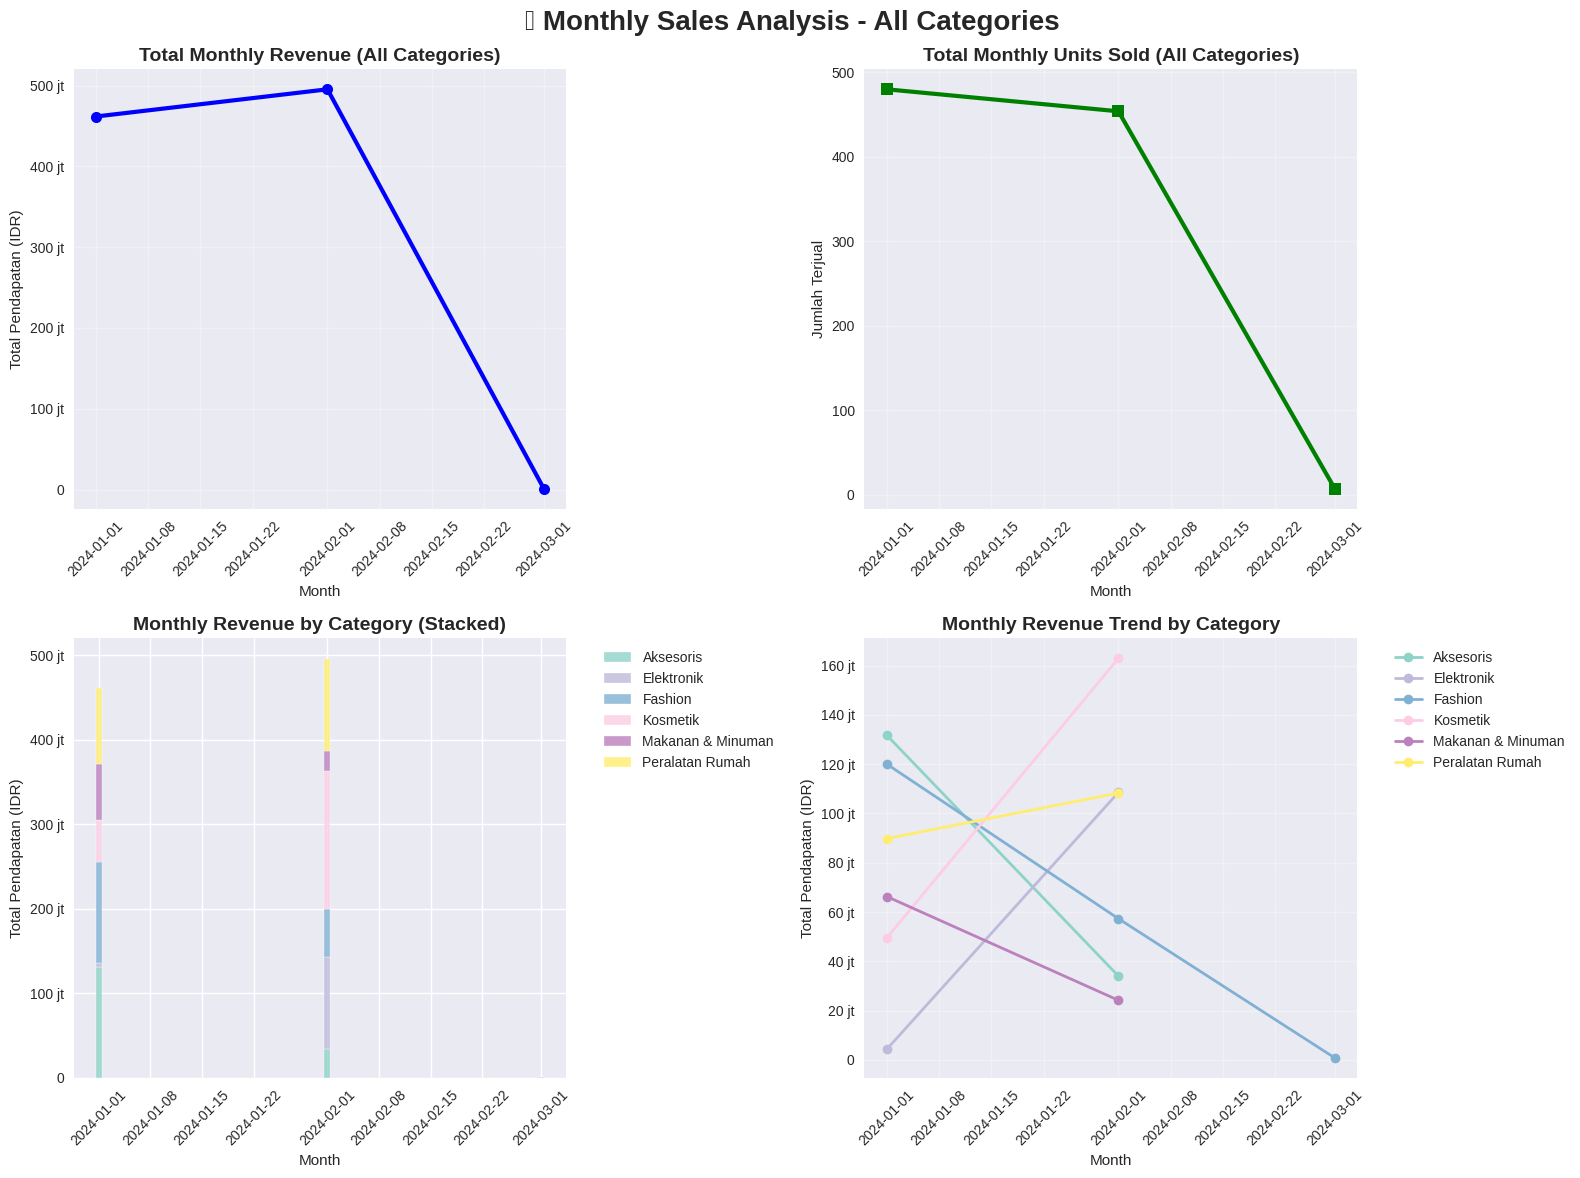

<ipython-input-45-12a4d0aacf52>:116: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


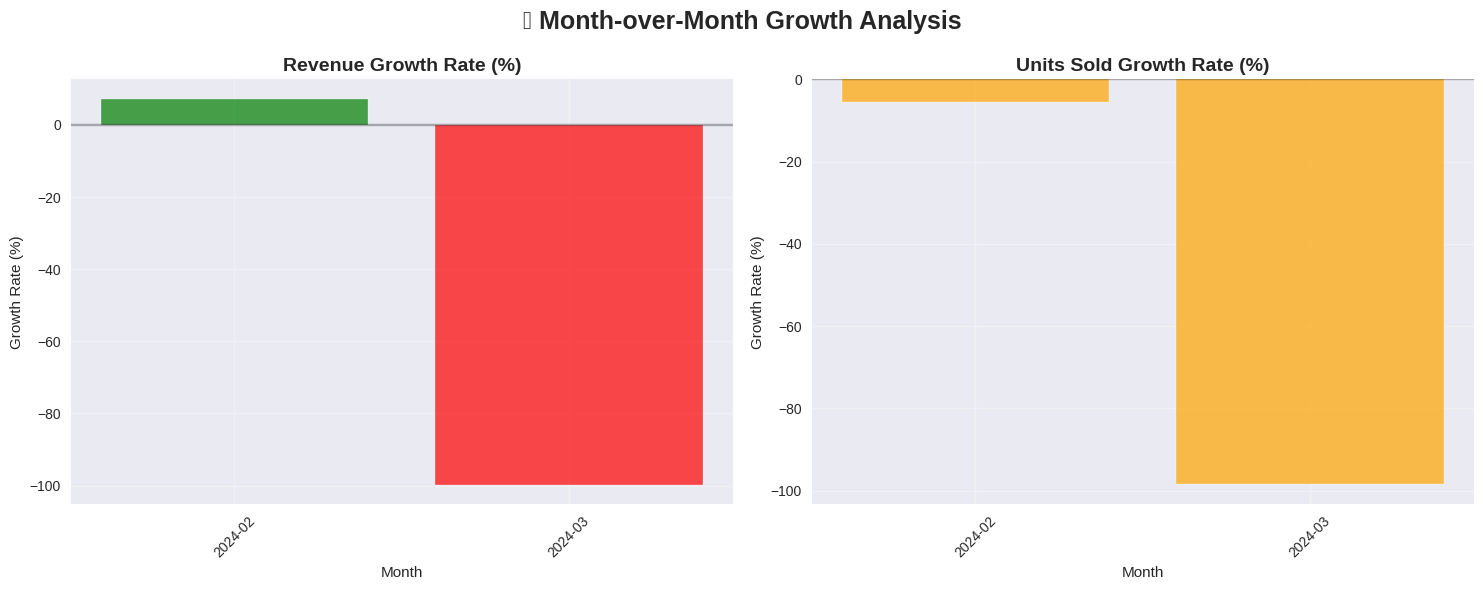

In [ ]:


# Fungsi untuk format angka jutaan (misal 1,000,000 jadi 1 jt)
def jutaan(x, pos):
    if x >= 1e6:
        return f'{int(x/1e6)} jt'
    elif x >= 1e3:
        return f'{int(x/1e3)} rb'
    else:
        return int(x)

# Pastikan data diurutkan dulu
monthly_total_sorted = monthly_total.sort_values('Year-Month').reset_index(drop=True)

# Hitung growth rate bulanan
monthly_total_sorted['Revenue_Growth'] = monthly_total_sorted['Total Pendapatan (IDR)'].pct_change() * 100
monthly_total_sorted['Units_Growth'] = monthly_total_sorted['Jumlah Terjual'].pct_change() * 100

# Isi NaN di bulan pertama dengan 0
monthly_total_sorted['Revenue_Growth'].fillna(0, inplace=True)
monthly_total_sorted['Units_Growth'].fillna(0, inplace=True)

# Plot untuk monthly analysis
fig2, axs2 = plt.subplots(2, 2, figsize=(16, 12))
fig2.suptitle('📈 Monthly Sales Analysis - All Categories', fontsize=20, fontweight='bold')

# Plot 1: Total Monthly Revenue
monthly_total['Date'] = monthly_total['Year-Month'].dt.start_time
axs2[0, 0].plot(monthly_total['Date'], monthly_total['Total Pendapatan (IDR)'],
         marker='o', linewidth=3, markersize=8, color='blue')
axs2[0, 0].set_title('Total Monthly Revenue (All Categories)', fontsize=14, fontweight='bold')
axs2[0, 0].set_xlabel('Month')
axs2[0, 0].set_ylabel('Total Pendapatan (IDR)')
axs2[0, 0].tick_params(axis='x', rotation=45)
axs2[0, 0].grid(True, alpha=0.3)
axs2[0, 0].yaxis.set_major_formatter(tick.FuncFormatter(jutaan))

# Plot 2: Total Monthly Units Sold
axs2[0, 1].plot(monthly_total['Date'], monthly_total['Jumlah Terjual'],
         marker='s', linewidth=3, markersize=8, color='green')
axs2[0, 1].set_title('Total Monthly Units Sold (All Categories)', fontsize=14, fontweight='bold')
axs2[0, 1].set_xlabel('Month')
axs2[0, 1].set_ylabel('Jumlah Terjual')
axs2[0, 1].tick_params(axis='x', rotation=45)
axs2[0, 1].grid(True, alpha=0.3)

# Plot 3: Monthly Revenue by Category (Stacked Bar)
monthly_pivot_plot = monthly_pivot.reset_index()
monthly_pivot_plot['Date'] = monthly_pivot_plot['Year-Month'].dt.start_time

categories = monthly_pivot.columns
colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))

bottom = np.zeros(len(monthly_pivot_plot))
for i, category in enumerate(categories):
    axs2[1, 0].bar(monthly_pivot_plot['Date'], monthly_pivot_plot[category],
            bottom=bottom, label=category, color=colors[i], alpha=0.8)
    bottom += monthly_pivot_plot[category]

axs2[1, 0].set_title('Monthly Revenue by Category (Stacked)', fontsize=14, fontweight='bold')
axs2[1, 0].set_xlabel('Month')
axs2[1, 0].set_ylabel('Total Pendapatan (IDR)')
axs2[1, 0].tick_params(axis='x', rotation=45)
axs2[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs2[1, 0].yaxis.set_major_formatter(tick.FuncFormatter(jutaan))

# Plot 4: Monthly Revenue by Category (Line Chart)
for i, category in enumerate(categories):
    category_data = monthly_by_category[monthly_by_category['Kategori Produk'] == category]
    category_data = category_data.copy()
    category_data['Date'] = category_data['Year-Month'].dt.start_time
    axs2[1, 1].plot(category_data['Date'], category_data['Total Pendapatan (IDR)'],
             marker='o', linewidth=2, label=category, color=colors[i])

axs2[1, 1].set_title('Monthly Revenue Trend by Category', fontsize=14, fontweight='bold')
axs2[1, 1].set_xlabel('Month')
axs2[1, 1].set_ylabel('Total Pendapatan (IDR)')
axs2[1, 1].tick_params(axis='x', rotation=45)
axs2[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs2[1, 1].grid(True, alpha=0.3)
axs2[1, 1].yaxis.set_major_formatter(tick.FuncFormatter(jutaan))

plt.tight_layout()
plt.show()

# Growth Analysis Visualization
fig3, axs3 = plt.subplots(1, 2, figsize=(15, 6))
fig3.suptitle('📈 Month-over-Month Growth Analysis', fontsize=18, fontweight='bold')

# Revenue Growth
growth_colors_rev = ['green' if x > 0 else 'red' for x in monthly_total_sorted['Revenue_Growth'][1:]]
axs3[0].bar(range(len(monthly_total_sorted[1:])), monthly_total_sorted['Revenue_Growth'][1:],
        color=growth_colors_rev, alpha=0.7)
axs3[0].set_title('Revenue Growth Rate (%)', fontsize=14, fontweight='bold')
axs3[0].set_xlabel('Month')
axs3[0].set_ylabel('Growth Rate (%)')
axs3[0].set_xticks(range(len(monthly_total_sorted[1:])))
axs3[0].set_xticklabels([str(x) for x in monthly_total_sorted['Year-Month'][1:]], rotation=45)
axs3[0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axs3[0].grid(True, alpha=0.3)

# Units Growth
growth_colors_units = ['blue' if x > 0 else 'orange' for x in monthly_total_sorted['Units_Growth'][1:]]
axs3[1].bar(range(len(monthly_total_sorted[1:])), monthly_total_sorted['Units_Growth'][1:],
        color=growth_colors_units, alpha=0.7)
axs3[1].set_title('Units Sold Growth Rate (%)', fontsize=14, fontweight='bold')
axs3[1].set_xlabel('Month')
axs3[1].set_ylabel('Growth Rate (%)')
axs3[1].set_xticks(range(len(monthly_total_sorted[1:])))
axs3[1].set_xticklabels([str(x) for x in monthly_total_sorted['Year-Month'][1:]], rotation=45)
axs3[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axs3[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## **📊 Key Insights dari Analisis Penjualan Bulanan**

1. **Performa Penjualan Bulanan (Monthly Sales Analysis)**

* **Total Pendapatan Bulanan (All Categories)**
Terlihat bahwa pendapatan tertinggi terjadi pada bulan Februari 2024, mencapai lebih dari Rp 500 juta, meningkat dibandingkan Januari. Namun, pada bulan Maret, terjadi penurunan drastis hingga 0, yang mengindikasikan tidak adanya transaksi pada bulan tersebut atau data yang belum tersedia.

*  **Total Produk Terjual Bulanan (All Categories)**
Jumlah produk terjual menunjukkan tren serupa dengan pendapatan, di mana Februari menjadi puncak penjualan, namun mengalami penurunan drastis pada Maret.

* **Pendapatan Bulanan per Kategori (Stacked dan Line Chart)**
Kategori Peralatan Rumah dan Kosmetik mendominasi pendapatan pada bulan Februari, dengan tren peningkatan dibanding Januari. Sebaliknya, kategori Aksesoris dan Elektronik mengalami penurunan signifikan. Hal ini menunjukkan adanya pergeseran minat konsumen ke kategori tertentu.

2. **Analisis Pertumbuhan Bulanan (Month-over-Month Growth)**

* **Pertumbuhan Pendapatan:**Februari menunjukkan pertumbuhan positif sekitar +8% dibanding bulan sebelumnya.Namun, pada Maret terjadi penurunan tajam sebesar -100%, yang kemungkinan besar disebabkan oleh belum adanya data atau tidak ada aktivitas penjualan.

* **Pertumbuhan Jumlah Produk Terjual:** Terdapat penurunan moderat sebesar -5% di Februari. Di bulan Maret, kembali terjadi penurunan hingga -100%, yang mendukung asumsi adanya stagnansi aktivitas penjualan atau kekosongan data.

##🔎 **Key Insight dan Rekomendasi Strategis**
1. **Kinerja Terbaik pada Februari 2024**: Bulan Februari mencatatkan performa terbaik secara penjualan dan pendapatan, yang bisa dikaitkan dengan momen promosi (misal: valentine atau kampanye awal tahun). Momentum seperti ini perlu dievaluasi dan ditiru di bulan-bulan berikutnya.

2. **Penurunan Drastis pada Maret**: Penurunan tajam pada Maret perlu ditelusuri lebih lanjut. Hal ini dapat disebabkan oleh keterlambatan input data atau adanya kendala operasional. Perlu dipastikan kembali konsistensi proses pelaporan data.

3. **Perubahan Minat Konsumen**: Kategori Peralatan Rumah dan Kosmetik semakin mendominasi, sehingga strategi produk dan kampanye promosi sebaiknya difokuskan ke kategori ini. Kategori yang menurun seperti Elektronik mungkin perlu strategi rebranding atau promo tambahan.

4. **Pertumbuhan Penjualan Tidak Selalu Sejalan dengan Volume Produk**:
Meski pendapatan meningkat di Februari, jumlah produk terjual justru sedikit menurun. Hal ini bisa disebabkan oleh peningkatan harga rata-rata produk atau dominasi produk dengan nilai tinggi. Peninjauan harga dan produk unggulan perlu dilakukan secara berkala.

5. **Stabilitas Operasional**:  
Perlu sistem monitoring penjualan real-time untuk mencegah kehilangan data atau keterlambatan pelaporan yang bisa berdampak pada akurasi analisis dan pengambilan keputusan.

## **Daily Sales**

In [ ]:
#pivot table
daily_sales = df.pivot_table(
    index=['Tanggal Transaksi', 'Nama Produk', 'Kategori Produk', 'Nama Affiliate', 'Wilayah Pembeli'],
    values=['Jumlah Terjual', 'Total Pendapatan (IDR)', 'Total Komisi (IDR)'],
    aggfunc='sum'
).reset_index()

# Menampilkan 5 baris pertama
daily_sales.head()


,Tanggal Transaksi,Nama Produk,Kategori Produk,Nama Affiliate,Wilayah Pembeli,Jumlah Terjual,Total Komisi (IDR),Total Pendapatan (IDR)
0,2024-01-01,Produk 10,Kosmetik,Affiliate B,Jakarta,6,8.940520e+05,9749748.84
1,2024-01-01,Produk 23,Fashion,Affiliate A,Bandung,2,1.068178e+05,1679525.52
2,2024-01-01,Produk 26,Fashion,Affiliate B,Medan,12,1.316066e+06,23798664.60
3,2024-01-02,Produk 16,Aksesoris,Affiliate B,Surabaya,17,1.032313e+06,12333494.56
4,2024-01-06,Produk 9,Elektronik,Affiliate D,Bandung,1,1.302909e+04,122569.06


In [ ]:
# Menggunakan metode str.contains, case=False, dan regex=False
daily_sales[daily_sales['Kategori Produk'].str.contains('Kosmetik', case=False, regex=False)]


,Tanggal Transaksi,Nama Produk,Kategori Produk,Harga Produk (IDR),Jumlah Terjual,Total Pendapatan (IDR),Komisi (%),Total Komisi (IDR),Nama Affiliate,Wilayah Pembeli
0,2024-01-01,Produk 10,Kosmetik,1624958.14,6,9749748.84,0.000094,8.940520e+05,Affiliate B,Jakarta
8,2024-01-10,Produk 8,Kosmetik,573211.09,16,9171377.44,0.000058,4.888344e+05,Affiliate B,Makassar
12,2024-01-13,Produk 45,Kosmetik,971179.44,3,2913538.32,0.000392,3.327261e+05,Affiliate E,Jakarta
20,2024-01-18,Produk 23,Kosmetik,678604.30,1,678604.30,0.002233,1.028086e+05,Affiliate E,Jakarta
30,2024-01-22,Produk 21,Kosmetik,1594811.34,13,20732547.42,0.000076,3.246717e+06,Affiliate C,Bandung
38,2024-01-26,Produk 44,Kosmetik,907516.53,6,5445099.18,0.000219,6.485113e+05,Affiliate B,Jakarta
46,2024-01-28,Produk 6,Kosmetik,282284.55,3,846853.65,0.001899,1.361741e+05,Affiliate C,Medan
53,2024-02-01,Produk 7,Kosmetik,255718.61,8,2045748.88,0.000970,4.060812e+05,Affiliate A,Surabaya
58,2024-02-04,Produk 38,Kosmetik,1071197.66,18,19281557.88,0.000035,1.305361e+06,Affiliate B,Jakarta
61,2024-02-07,Produk 9,Kosmetik,1679700.00,17,28554900.00,0.000033,2.669883e+06,Affiliate D,Medan


<ipython-input-29-194fad5b13d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kosmetik['Jumlah Terjual'] = pd.to_numeric(Kosmetik['Jumlah Terjual'], errors='coerce')


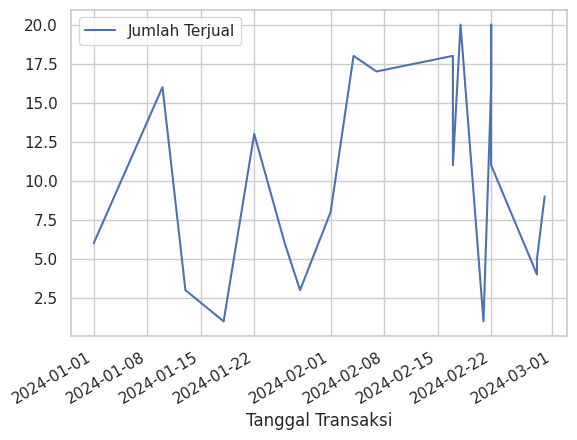

In [ ]:
Kosmetik= daily_sales[daily_sales['Kategori Produk'].str.contains('Kosmetik', case=False, regex=False)]

# Ubah tipe data kolom Jumlah Order menjadi numerik
Kosmetik['Jumlah Terjual'] = pd.to_numeric(Kosmetik['Jumlah Terjual'], errors='coerce')

# Gunakan metode .loc untuk mengubah data secara langsung
Kosmetik.loc[Kosmetik['Jumlah Terjual'].isna(), 'Jumlah Terjual'] = 5

# Buat plot garis untuk kolom Jumlah Order
Kosmetik.plot(x='Tanggal Transaksi', y='Jumlah Terjual', kind='line')
plt.show()

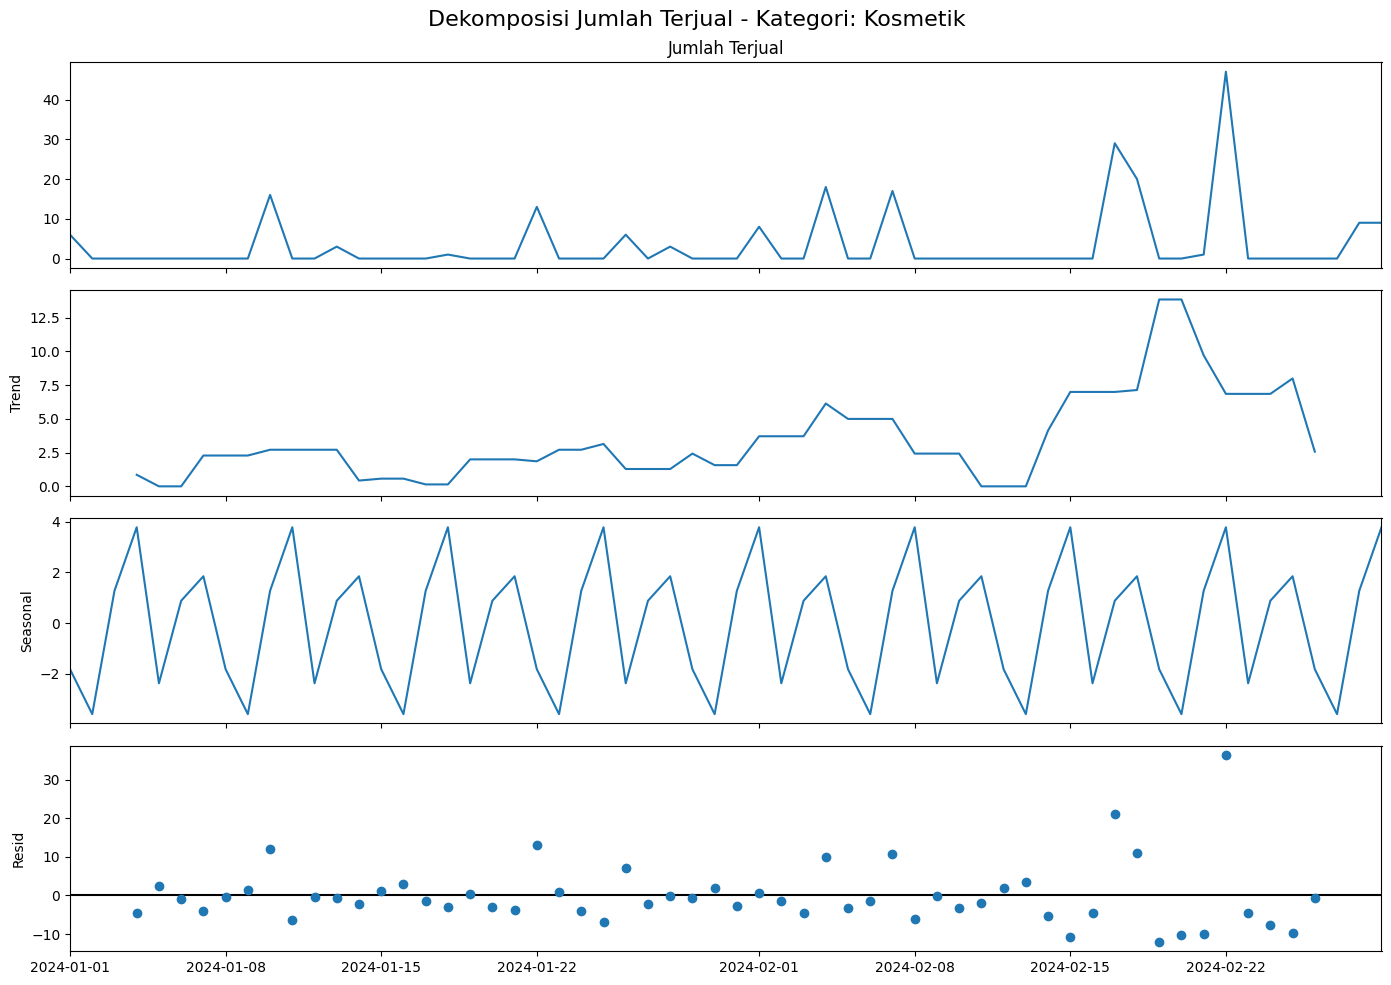

In [ ]:

df['Tanggal Transaksi'] = pd.to_datetime(df['Tanggal Transaksi'])

df_kosmetik = df[df['Kategori Produk'] == 'Kosmetik'].copy()

# Set index ke Tanggal Transaksi dan resample per hari
df_kosmetik = df_kosmetik.set_index('Tanggal Transaksi').resample('D')['Jumlah Terjual'].sum()
df_kosmetik = df_kosmetik.fillna(0)

#  dekomposisi time series
dekomposisi_kosmetik = seasonal_decompose(df_kosmetik, model='additive', period=7)

#  hasil dekomposisi
fig = dekomposisi_kosmetik.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Dekomposisi Jumlah Terjual - Kategori: Kosmetik', fontsize=16)
plt.tight_layout()
plt.show()


## **Analisis Grafik Dekomposisi Penjualan - Kategori Elektronik**

1. Jumlah Terjual (Data Asli)
* Grafik teratas menunjukkan jumlah penjualan harian.

* Terlihat penjualan cukup fluktuatif, dengan banyak hari memiliki penjualan 0–5 unit, namun:

1. Ada lonjakan besar sekitar pertengahan hingga akhir Februari, dengan penjualan mencapai hampir 40 unit dalam satu hari.

2. Juga terlihat puncak lain di awal Januari dan pertengahan Januari.

## **Interpretasi:**
* Lonjakan besar tidak merata, menunjukkan kemungkinan adanya promosi khusus, kampanye marketing, atau efek hari besar:

  1. Awal Januari (Tahun Baru): peningkatan penampilan.

  2. Pertengahan Februari (menjelang Imlek & Pemilu): peningkatan aktivitas sosial → kebutuhan kosmetik meningkat.

  3. Akhir Februari: bisa jadi promosi besar atau menjelang kampanye Ramadhan.

2. Trend (Tren Jangka Panjang)
* Garis tren menunjukkan rata-rata perubahan penjualan dari waktu ke waktu.Terlihat tren:

  1. Datar dan rendah di awal Januari (sekitar 1–2 unit per hari).

  2. Mulai meningkat secara perlahan sejak awal Februari.

  3. Puncak tren terjadi di pertengahan Februari (sekitar 9–10 unit/hari).

  4. Mulai menurun kembali di akhir Februari.

## **Interpretasi:**
* Terlihat kenaikan tren signifikan dari awal Februari → bisa dipicu oleh:

* 10 Februari (Tahun Baru Imlek) → banyak konsumen memperhatikan penampilan.

* 14 Februari (Pemilu dan Valentine) → kombinasi acara sosial dan momen romantis meningkatkan permintaan.

* Setelah itu tren mulai menurun lagi.

3. Seasonal (Pola Musiman)
* Komponen ini menunjukkan pola mingguan (harian dalam satu minggu).

* Pola musiman sangat jelas:

  1. Nilai tertinggi (penjualan lebih tinggi dari rata-rata) terjadi secara berulang.

  2. Nilai tertinggi berkisar di hari Jumat–Minggu.

  3. Nilai terendah muncul di hari kerja awal minggu (Senin–Rabu).

## **Interpretasi:**
* Menunjukkan konsumen lebih aktif membeli kosmetik di akhir pekan, mungkin karena:Persiapan untuk acara sosial, Waktu luang untuk berbelanja, Bisa juga efek dari promosi mingguan dari marketplace.

4. Residual (Sisa / Deviasi)
* Ini adalah penjualan yang tidak bisa dijelaskan oleh tren maupun musiman.Beberapa poin residual sangat tinggi → menunjukkan penjualan jauh lebih tinggi dari pola umum, terutama:

  1. Awal Januari

  2. Pertengahan Februari

  3. Akhir Februari

* Juga terdapat beberapa titik residual negatif → penjualan jauh lebih rendah dari perkiraan.

## **Interpretasi:**
* Penjualan yang sangat tinggi kemungkinan dipicu oleh:

  1. Flash sale / promosi besar

  2. Kolaborasi brand / endorse influencer

  3. Event nasional (Imlek, Pemilu, Valentine)

  4. Penjualan rendah bisa karena minimnya promosi, stagnasi katalog produk, atau gangguan eksternal.



In [ ]:
# Menggunakan metode str.contains, case=False, dan regex=False
daily_sales[daily_sales['Kategori Produk'].str.contains('Fashion', case=False, regex=False)]

,Tanggal Transaksi,Nama Produk,Kategori Produk,Harga Produk (IDR),Jumlah Terjual,Total Pendapatan (IDR),Komisi (%),Total Komisi (IDR),Nama Affiliate,Wilayah Pembeli
1,2024-01-01,Produk 23,Fashion,839762.76,2,1679525.52,0.000379,1.068178e+05,Affiliate A,Bandung
2,2024-01-01,Produk 26,Fashion,1983222.05,12,23798664.60,0.000023,1.316066e+06,Affiliate B,Medan
5,2024-01-07,Produk 28,Fashion,86468.82,20,1729376.40,0.000845,2.528348e+05,Affiliate B,Makassar
6,2024-01-09,Produk 17,Fashion,1723081.31,20,34461626.20,0.000043,5.120998e+06,Affiliate D,Jakarta
16,2024-01-15,Produk 50,Fashion,681478.11,5,3407390.55,0.000222,2.575987e+05,Affiliate B,Semarang
17,2024-01-16,Produk 25,Fashion,1903704.40,4,7614817.60,0.000139,8.056477e+05,Affiliate C,Medan
26,2024-01-19,Produk 41,Fashion,1125715.35,9,10131438.15,0.000152,1.559228e+06,Affiliate E,Bandung
32,2024-01-23,Produk 29,Fashion,1319524.42,9,11875719.78,0.000057,8.016111e+05,Affiliate D,Jakarta
35,2024-01-25,Produk 29,Fashion,243977.61,16,3903641.76,0.000303,4.614105e+05,Affiliate E,Jakarta
43,2024-01-28,Produk 1,Fashion,409068.00,7,2863476.00,0.000253,2.073157e+05,Affiliate D,Makassar


<ipython-input-31-f5a99e6df16c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fashion['Jumlah Terjual'] = pd.to_numeric(Fashion['Jumlah Terjual'], errors='coerce')


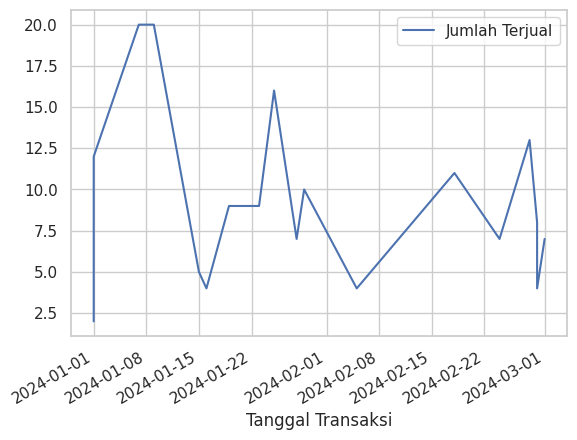

In [ ]:
Fashion = daily_sales[daily_sales['Kategori Produk'].str.contains('Fashion', case=False, regex=False)]

# Ubah tipe data kolom Jumlah Order menjadi numerik
Fashion['Jumlah Terjual'] = pd.to_numeric(Fashion['Jumlah Terjual'], errors='coerce')

# Gunakan metode .loc untuk mengubah data secara langsung
Fashion.loc[Fashion['Jumlah Terjual'].isna(), 'Jumlah Terjual'] = 5

# Buat plot garis untuk kolom Jumlah Order
Fashion.plot(x='Tanggal Transaksi', y='Jumlah Terjual', kind='line')
plt.show()

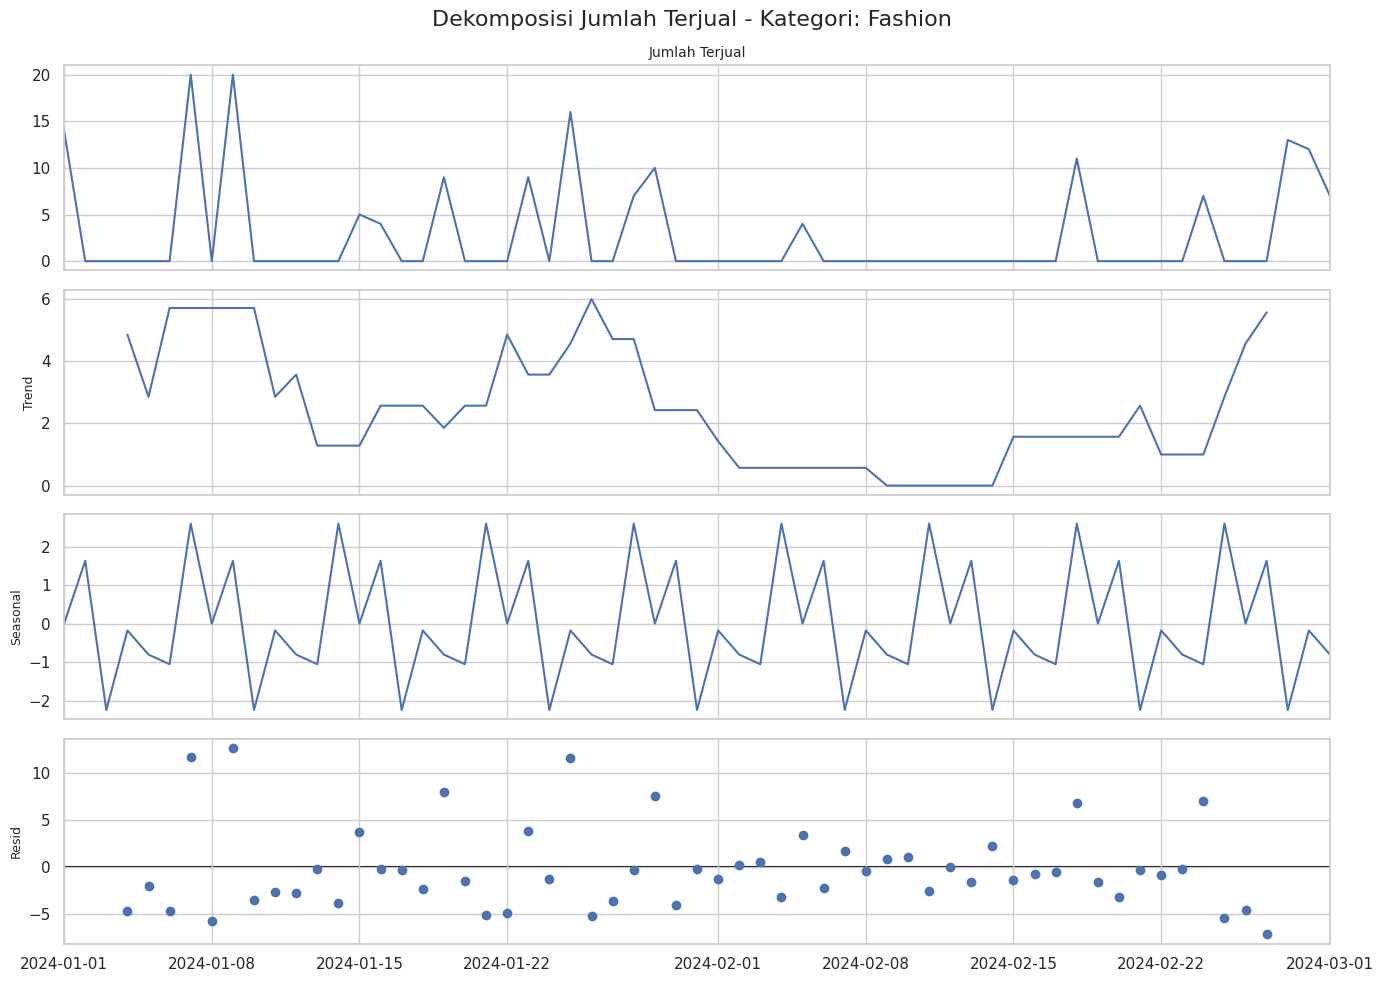

In [ ]:

df['Tanggal Transaksi'] = pd.to_datetime(df['Tanggal Transaksi'])

# Fungsi dekomposisi berdasarkan kategori produk
def decompose_by_kategori(df, value_col='Jumlah Terjual', period=7):
    hasil_dekomposisi = {}

    for kategori in df['Kategori Produk'].unique():
        data_kategori = df[df['Kategori Produk'] == kategori].copy()
        data_kategori = data_kategori.set_index('Tanggal Transaksi').resample('D')[value_col].sum()
        data_kategori = data_kategori.fillna(0)

        try:
            dekomposisi = seasonal_decompose(data_kategori, model='additive', period=period)
            hasil_dekomposisi[kategori] = dekomposisi
        except Exception as e:
            print(f"Gagal dekomposisi kategori '{kategori}': {e}")

    return hasil_dekomposisi

# Jalankan dekomposisi
dekomposisi_per_kategori = decompose_by_kategori(df)

# Contoh visualisasi untuk salah satu kategori
kategori_contoh = list(dekomposisi_per_kategori.keys())[0]
fig = dekomposisi_per_kategori[kategori_contoh].plot()
fig.set_size_inches(14, 10)
plt.suptitle(f'Dekomposisi Jumlah Terjual - Kategori: {kategori_contoh}', fontsize=16)
plt.tight_layout()
plt.show()


## **Analisis Grafik Dekomposisi Penjualan - Kategori Fashion**
1. Jumlah Terjual (Original Series)
* Garis pertama (paling atas) menunjukkan data penjualan aktual harian selama periode Januari hingga akhir Februari 2024.

* Terdapat fluktuasi besar:

  1. Beberapa hari dengan lonjakan sangat tinggi (20 unit terjual/hari) dan banyak hari dengan penjualan 0–1 unit/hari.

  2. Lonjakan signifikan terlihat di sekitar awal Januari, akhir Januari, dan akhir Februari.

## **Interpretasi:**
* Penjualan tidak stabil dari hari ke hari.

* Lonjakan besar kemungkinan berkaitan dengan hari besar seperti:

  1. 1 Januari (Tahun Baru): belanja fashion untuk pesta/liburan.

  2. Akhir Januari – awal Februari: persiapan Tahun Baru Imlek.

  3. Akhir Februari: kemungkinan ada promo bulanan atau menjelang Ramadhan.

2. Trend (Tren Jangka Panjang)
* Garis kedua menunjukkan arah tren rata-rata penjualan dari waktu ke waktu.

* Awal Januari: Tren cukup tinggi (sekitar 4–6 unit/hari).

* Pertengahan Januari–awal Februari: Tren menurun.

* Pertengahan Februari–akhir Februari: Tren kembali meningkat tajam menuju akhir bulan.

## **Interpretasi:**
* Tren positif di akhir Februari bisa menjadi sinyal momentum promosi menjelang Ramadhan.

* Meski data harian sangat fluktuatif, tren membantu melihat arah pasar yang kembali tumbuh.

3. Seasonal (Musiman/Mingguan)
* Garis ketiga adalah pola musiman berulang – dalam kasus ini kemungkinan mingguan.

* Terlihat pola berulang setiap 7 hari, kemungkinan mengindikasikan:

* Penjualan naik pada hari tertentu setiap minggu (misalnya: Jumat–Minggu).

* Penjualan turun di awal minggu (Senin–Rabu).

## **Interpretasi:**
* Pelanggan lebih aktif berbelanja fashion di akhir pekan.

* Efek gajian bulanan atau promosi mingguan juga bisa memperkuat pola ini.

4. Resid (Residual / Noise)
* Garis keempat adalah selisih antara data aktual dengan (tren + musiman) → disebut sebagai noise atau deviasi tak terduga.

* Terdapat residual positif besar (penjualan jauh lebih tinggi dari ekspektasi) terutama di:

  1. Awal Januari

  2.  Pertengahan Januari

  3. Akhir Februari

* Terdapat residual negatif (penjualan lebih rendah dari perkiraan) cukup merata.

## **Interpretasi:**
* Promosi mendadak, event khusus, atau libur nasional bisa menyebabkan lonjakan di luar pola normal.

* Hari besar seperti Imlek atau persiapan Ramadan kemungkinan memicu deviasi positif.

## **DAFTAR HARI LIBUR NASIONAL & PERISTIWA PENTING 2024**
(Berkaitan dengan perilaku konsumen & fluktuasi penjualan)

  1. Tanggal	Peristiwa / Hari Libur	Keterangan	Potensi Dampak Penjualan
  1 Jan 2024	Tahun Baru Masehi	Libur Nasional	Kenaikan permintaan akhir Des–awal Jan (resolusi tahun baru, liburan)
  2. 8 Feb 2024	Isra Mi'raj Nabi Muhammad SAW	Libur Keagamaan Islam	Cenderung netral terhadap fashion/aksesori (kecuali Muslim fashion)
  3. 10 Feb 2024	Tahun Baru Imlek	Libur Nasional	Potensi kenaikan penjualan fashion & aksesoris, khususnya produk berwarna merah/emas
  4. 14 Feb 2024	Pemilu Serentak	Libur Nasional	Kegiatan belanja menurun (fokus pemilu), tapi bisa ada lonjakan sebelum atau sesudah hari-H
  5. 11 Mar 2024	Hari Suci Nyepi	Libur Nasional (Umat Hindu)	Aktivitas belanja menurun drastis, toko-toko tutup (terutama di Bali)
  6. 8–15 Apr 2024	Cuti Bersama Idul Fitri 1445 H	Libur Nasional & Cuti Bersama	Puncak penjualan fashion & aksesoris terutama 1–2 minggu sebelum (musim belanja Lebaran):

In [ ]:
# Menggunakan metode str.contains, case=False, dan regex=False
daily_sales[daily_sales['Kategori Produk'].str.contains('Aksesoris', case=False, regex=False)]

,Tanggal Transaksi,Nama Produk,Kategori Produk,Harga Produk (IDR),Jumlah Terjual,Total Pendapatan (IDR),Komisi (%),Total Komisi (IDR),Nama Affiliate,Wilayah Pembeli
3,2024-01-02,Produk 16,Aksesoris,725499.68,17,12333494.56,0.000068,1.032313e+06,Affiliate B,Surabaya
9,2024-01-11,Produk 2,Aksesoris,1759211.37,16,28147381.92,0.000027,2.170163e+06,Affiliate C,Surabaya
14,2024-01-15,Produk 31,Aksesoris,1619729.01,19,30774851.19,0.000039,3.668362e+06,Affiliate C,Medan
31,2024-01-22,Produk 8,Aksesoris,1896828.12,10,18968281.20,0.000076,2.746607e+06,Affiliate A,Surabaya
34,2024-01-24,Produk 23,Aksesoris,712063.88,9,6408574.92,0.000262,1.077281e+06,Affiliate B,Surabaya
37,2024-01-26,Produk 18,Aksesoris,334250.57,7,2339753.99,0.000818,4.475949e+05,Affiliate D,Jakarta
39,2024-01-26,Produk 7,Aksesoris,1725168.03,7,12076176.21,0.000162,2.369346e+06,Affiliate B,Semarang
42,2024-01-27,Produk 26,Aksesoris,1190547.81,8,9524382.48,0.000197,1.789631e+06,Affiliate D,Surabaya
44,2024-01-28,Produk 16,Aksesoris,599115.12,3,1797345.36,0.000610,1.969891e+05,Affiliate C,Jakarta
50,2024-01-31,Produk 34,Aksesoris,1694824.61,2,3389649.22,0.000245,2.810019e+05,Affiliate B,Surabaya


<ipython-input-33-d370baddf031>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Aksesoris['Jumlah Terjual'] = pd.to_numeric(Aksesoris['Jumlah Terjual'], errors='coerce')


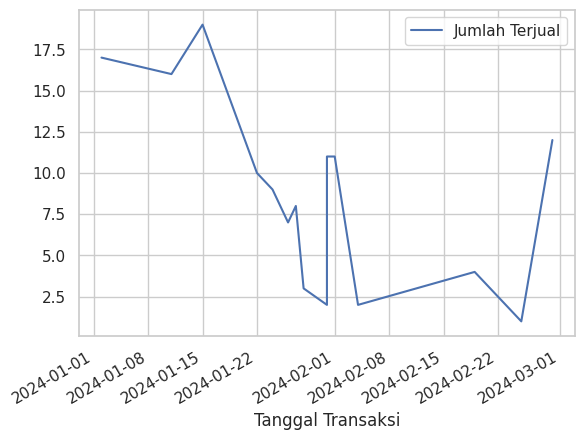

In [ ]:
Aksesoris = daily_sales[daily_sales['Kategori Produk'].str.contains('Aksesoris', case=False, regex=False)]

# Ubah tipe data kolom Jumlah Order menjadi numerik
Aksesoris['Jumlah Terjual'] = pd.to_numeric(Aksesoris['Jumlah Terjual'], errors='coerce')

# Gunakan metode .loc untuk mengubah data secara langsung
Aksesoris.loc[Aksesoris['Jumlah Terjual'].isna(), 'Jumlah Terjual'] = 5

# Buat plot garis untuk kolom Jumlah Order
Aksesoris.plot(x='Tanggal Transaksi', y='Jumlah Terjual', kind='line')
plt.show()

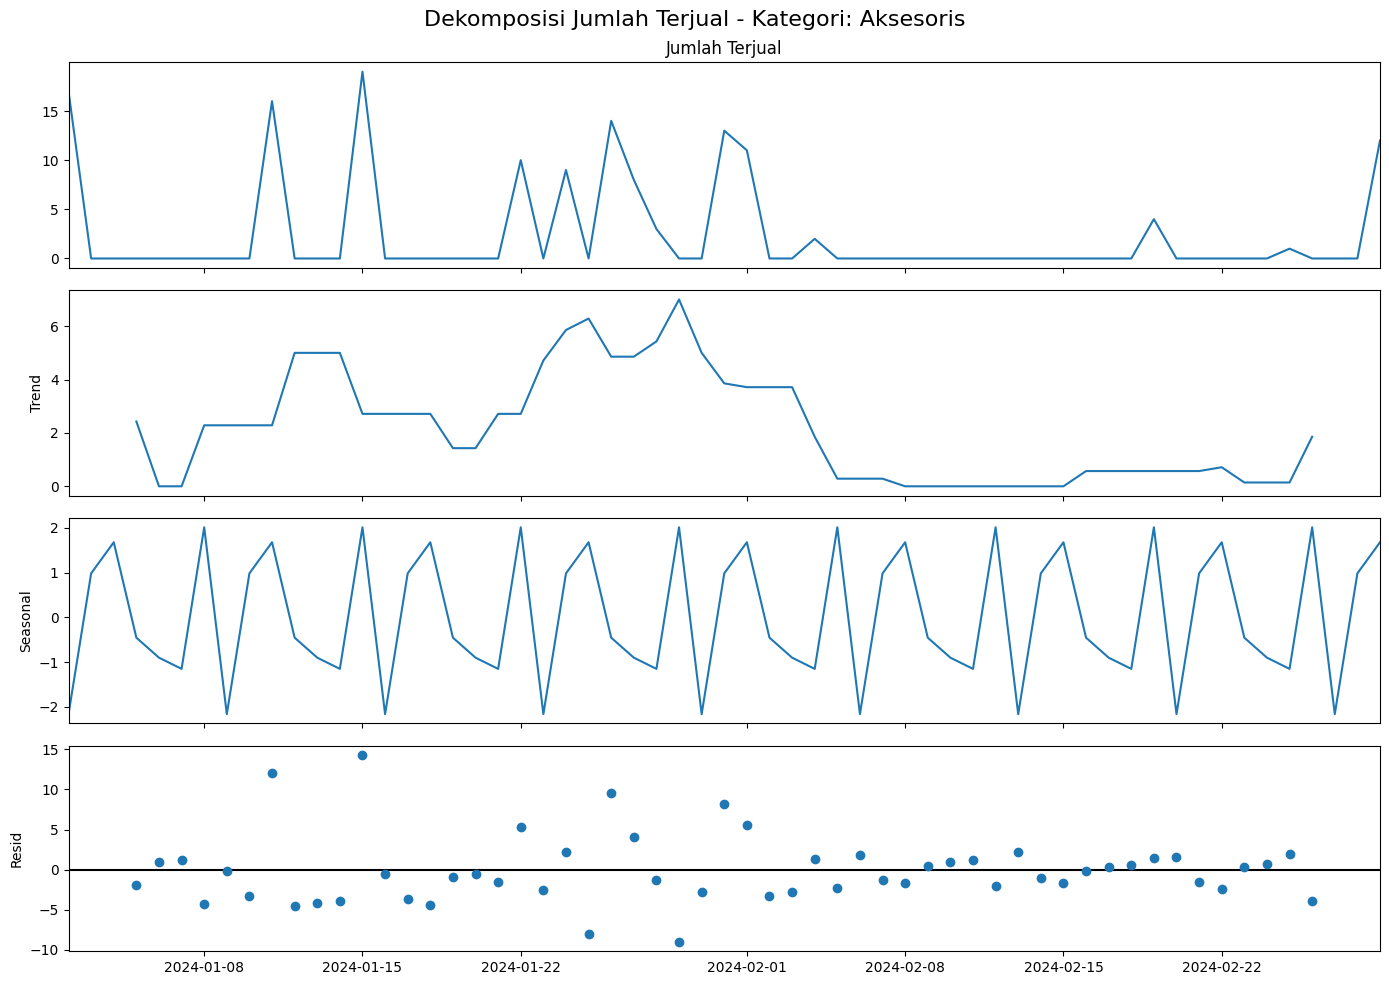

In [4]:

df_aksesoris = df[df['Kategori Produk'] == 'Aksesoris'].copy()

# Set index ke Tanggal Transaksi dan resample per hari
df_aksesoris = df_aksesoris.set_index('Tanggal Transaksi').resample('D')['Jumlah Terjual'].sum()
df_aksesoris = df_aksesoris.fillna(0)

# Lakukan dekomposisi time series
dekomposisi_aksesoris = seasonal_decompose(df_aksesoris, model='additive', period=7)

# Visualisasikan hasil dekomposisi
fig = dekomposisi_aksesoris.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Dekomposisi Jumlah Terjual - Kategori: Aksesoris', fontsize=16)
plt.tight_layout()
plt.show()


## **Analisis Grafik Dekomposisi Penjualan - Kategori Aksesoris**

1. Jumlah Terjual (Data Aktual)
* Grafik pertama menampilkan jumlah produk aksesoris yang terjual setiap hari.Pada awal Januari, terdapat lonjakan awal yang tinggi, diikuti oleh periode datar (penjualan nol atau sangat rendah).

* Pertengahan Januari hingga awal Februari menunjukkan fluktuasi tajam, dengan beberapa hari mengalami penjualan yang tinggi secara sporadis.Setelah awal Februari, penjualan menurun drastis dan cenderung mendatar, menandakan penurunan minat atau stok yang mungkin mulai habis.Akhir Februari terdapat sedikit kenaikan, kemungkinan karena event promosi penutup bulan atau persiapan Maret.

2.  Trend (Komponen Tren)
* Grafik kedua menunjukkan arah pergerakan tren jangka menengah penjualan.Tren berawal dari titik rendah, lalu naik secara bertahap hingga mencapai puncak pada akhir Januari.

* Setelah awal Februari, tren menurun tajam dan stagnan di level sangat rendah, mencerminkan berkurangnya aktivitas pembelian atau pengaruh faktor eksternal (libur panjang, pemilu, dll). Ini mengindikasikan bahwa masa tertinggi penjualan aksesori berada di bulan Januari, dan Februari bukanlah bulan yang kuat untuk kategori ini.

3. Seasonal (Komponen Musiman)
* Grafik ketiga memperlihatkan pola musiman yang berulang.Terlihat adanya pola mingguan yang konsisten, dengan puncak sekitar setiap 7 hari sekali.

* Nilai seasonal berfluktuasi dari -2 hingga +2, yang menandakan adanya pengaruh hari tertentu terhadap volume penjualan – kemungkinan besar akhir pekan (Sabtu/Minggu) menjadi waktu favorit pelanggan untuk berbelanja aksesoris.Artinya, meskipun tren turun, pola musiman tetap berulang, menunjukkan adanya rutinitas mingguan dalam perilaku konsumen.

4.  Residual (Komponen Sisa/Anomali)
* Grafik keempat menunjukkan deviasi antara data aktual dengan tren + musiman, yang mewakili kejadian tidak terduga atau unik.

* Beberapa hari di Januari menunjukkan residual tinggi (>10), mengindikasikan bahwa penjualan pada hari tersebut sangat di luar dugaan, mungkin karena:

  1. Promo dadakan

  2. Flash sale

  3. Influencer/iklan media sosial

* Sebaliknya, Februari menunjukkan residual rendah dan mendekati nol, artinya data penjualan di bulan ini sangat sesuai dengan pola tren + musiman, tanpa kejadian luar biasa.

## **Kesimpulan Utama**
* Penjualan aksesoris mengalami puncak pada akhir Januari dan menurun signifikan sepanjang Februari.

* Pola musiman harian tetap konsisten, terutama menunjukkan peningkatan penjualan mingguan (mungkin akhir pekan).

* Beberapa anomali penjualan di Januari disebabkan oleh faktor eksternal (mungkin promosi).

* Hari besar nasional tidak memberikan dampak signifikan terhadap penjualan aksesoris.

In [ ]:
# Menggunakan metode str.contains, case=False, dan regex=False
daily_sales[daily_sales['Kategori Produk'].str.contains('Elektronik', case=False, regex=False)]

,Tanggal Transaksi,Nama Produk,Kategori Produk,Harga Produk (IDR),Jumlah Terjual,Total Pendapatan (IDR),Komisi (%),Total Komisi (IDR),Nama Affiliate,Wilayah Pembeli
4,2024-01-06,Produk 9,Elektronik,122569.06,1,122569.06,0.008673,1.302909e+04,Affiliate D,Bandung
18,2024-01-16,Produk 7,Elektronik,195156.02,20,3903120.40,0.000345,5.253600e+05,Affiliate C,Surabaya
23,2024-01-19,Produk 17,Elektronik,101476.81,3,304430.43,0.004356,4.036748e+04,Affiliate C,Jakarta
55,2024-02-03,Produk 31,Elektronik,1210796.34,1,1210796.34,0.001074,1.574035e+05,Affiliate A,Medan
57,2024-02-04,Produk 15,Elektronik,1393673.74,7,9755716.18,0.000057,5.414422e+05,Affiliate B,Medan
59,2024-02-04,Produk 6,Elektronik,1594056.49,3,4782169.47,0.000371,8.474004e+05,Affiliate C,Bandung
62,2024-02-12,Produk 19,Elektronik,1669197.59,14,23368766.26,0.000055,3.009897e+06,Affiliate C,Surabaya
68,2024-02-16,Produk 42,Elektronik,121062.91,1,121062.91,0.014464,2.119812e+04,Affiliate E,Jakarta
70,2024-02-17,Produk 14,Elektronik,920585.60,10,9205856.00,0.000184,1.556710e+06,Affiliate C,Surabaya
74,2024-02-18,Produk 27,Elektronik,980383.94,20,19607678.80,0.000068,2.603900e+06,Affiliate B,Makassar


<ipython-input-35-31f58fbac292>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Elektronik['Jumlah Terjual'] = pd.to_numeric(Elektronik['Jumlah Terjual'], errors='coerce')


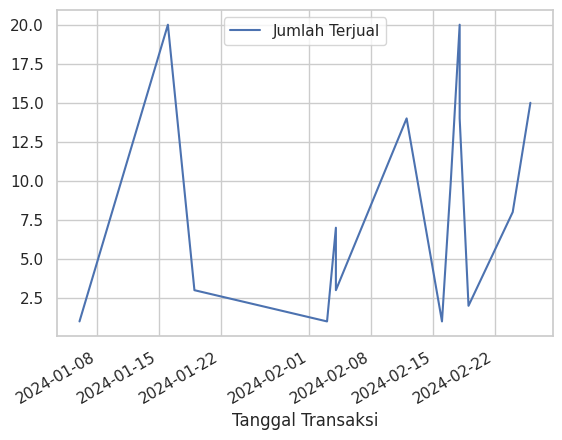

In [ ]:
Elektronik = daily_sales[daily_sales['Kategori Produk'].str.contains('Elektronik', case=False, regex=False)]

# Ubah tipe data kolom Jumlah Order menjadi numerik
Elektronik['Jumlah Terjual'] = pd.to_numeric(Elektronik['Jumlah Terjual'], errors='coerce')

# Gunakan metode .loc untuk mengubah data secara langsung
Elektronik.loc[Elektronik['Jumlah Terjual'].isna(), 'Jumlah Terjual'] = 5

# Buat plot garis untuk kolom Jumlah Order
Elektronik.plot(x='Tanggal Transaksi', y='Jumlah Terjual', kind='line')
plt.show()

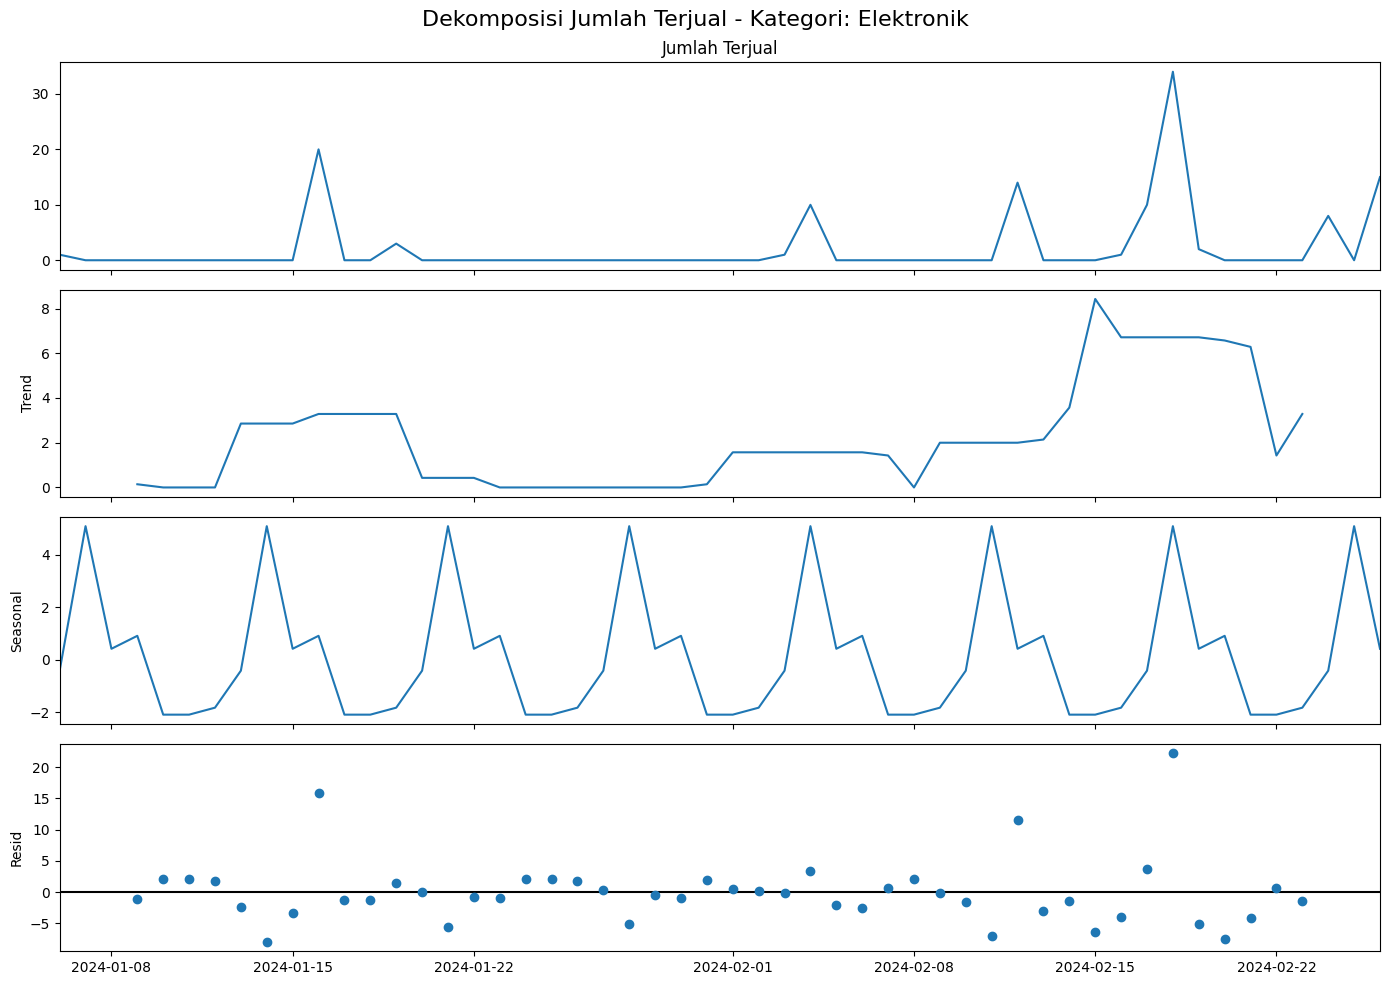

In [5]:

df_elektronik = df[df['Kategori Produk'] == 'Elektronik'].copy()

# Set index ke Tanggal Transaksi dan resample per hari
df_elektronik = df_elektronik.set_index('Tanggal Transaksi').resample('D')['Jumlah Terjual'].sum()
df_elektronik = df_elektronik.fillna(0)

# Lakukan dekomposisi time series
dekomposisi_elektronik = seasonal_decompose(df_elektronik, model='additive', period=7)

# Visualisasikan hasil dekomposisi
fig = dekomposisi_elektronik.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Dekomposisi Jumlah Terjual - Kategori: Elektronik', fontsize=16)
plt.tight_layout()
plt.show()


## **Analisis Grafik Dekomposisi Penjualan - Kategori Elektronik**

1.  Jumlah Terjual (Observasi Asli)
* Grafik paling atas menunjukkan jumlah produk elektronik yang terjual per hari.
Awal Januari menunjukkan penjualan yang sangat rendah dan cenderung datar, menandakan bahwa pada periode ini aktivitas penjualan sangat minim, bisa jadi karena sudah melewati musim belanja akhir tahun.

* Terlihat ada beberapa lonjakan tajam pada pertengahan Januari dan meningkat secara signifikan pada pertengahan Februari, mengindikasikan adanya momen-momen khusus atau promosi besar yang mendorong penjualan.

2.  Trend (Komponen Tren)
* Grafik kedua menunjukkan arah umum pergerakan penjualan dalam jangka menengah hingga panjang. Tren di awal periode (Januari) berada di level sangat rendah, sejalan dengan jumlah penjualan yang rendah.
* Mulai awal Februari, tren mulai naik dan mencapai puncaknya pada sekitar pertengahan Februari, kemudian mengalami penurunan ringan di akhir bulan.
Kenaikan tren ini mengindikasikan adanya peningkatan minat atau aktivitas pembelian elektronik secara umum di bulan Februari.

3. Seasonal (Komponen Musiman)
* Komponen musiman menggambarkan pola berulang dalam periode pendek (dalam hal ini tampaknya mingguan).Pola musiman menunjukkan kenaikan tajam secara konsisten setiap 7 hari, yang kemungkinan besar terjadi pada akhir pekan (Sabtu/Minggu).Nilai musiman ini memiliki rentang yang jelas, antara -2 hingga +5, yang berarti terdapat pengaruh hari tertentu yang cukup kuat terhadap volume penjualan.

4.  Residual (Sisa/Anomali)
* Komponen residual menunjukkan penyimpangan data dari tren dan pola musiman.
Pada beberapa hari, khususnya pertengahan Februari, terdapat nilai residual yang sangat tinggi.Hal ini menunjukkan adanya kejadian atau event spesifik yang menyebabkan lonjakan penjualan besar, yang tidak dapat dijelaskan oleh tren umum atau pola mingguan.

 Pengaruh Hari Besar:
* 8 Februari – Isra Mi’raj: Terjadi sedikit peningkatan penjualan, namun tidak signifikan, artinya hari libur ini tidak berdampak besar terhadap belanja elektronik.

* 10 Februari – Imlek: Terjadi lonjakan penjualan besar yang tampak jelas pada grafik dan residual. Ini mencerminkan momen belanja masyarakat yang tinggi, mungkin karena budaya memberi hadiah atau promosi Imlek.

* 14 Februari – Pemilu: Penjualan masih tinggi, namun tidak disertai lonjakan residual besar. Artinya, meskipun hari libur, peningkatan ini sudah tercermin dalam tren yang sedang naik.

## Kesimpulan
1. Penjualan di awal Januari rendah dan datar, mencerminkan periode yang sepi dari aktivitas belanja besar.

2. Mulai Februari, tren meningkat secara bertahap dan mencapai puncak di pertengahan bulan.

3. Pola musiman mingguan sangat jelas, kemungkinan kuat dipengaruhi oleh hari libur akhir pekan.

4. Hari besar seperti Tahun Baru Imlek memiliki dampak signifikan, menghasilkan lonjakan penjualan yang di luar pola biasa.

5. Event seperti Isra Mi’raj dan Pemilu berdampak terbatas atau hanya mendorong penjualan secara tidak langsung.

1. Grafik Jumlah Terjual
* Grafik paling atas menunjukkan jumlah produk elektronik yang terjual per hari selama periode yang diamati (sekitar awal Januari hingga akhir Februari 2024).

* Terlihat adanya fluktuasi tajam pada beberapa titik, terutama di pertengahan Januari dan pertengahan hingga akhir Februari.

* Terdapat puncak yang sangat tinggi, yang kemungkinan merupakan hari dengan promo atau event khusus (misalnya flash sale atau campaign besar).

2. Komponen Trend
* Grafik kedua menunjukkan komponen tren, yang mencerminkan arah umum penjualan dari waktu ke waktu dengan menghaluskan fluktuasi jangka pendek.

* Awal Januari menunjukkan tren yang cukup datar, bahkan mendekati nol, menandakan volume penjualan yang rendah atau stabil.


*  8 Februari 2024 (Isra Mi’raj)
Di sekitar tanggal ini, terlihat sedikit lonjakan pada jumlah terjual, meskipun tidak signifikan. Tren tetap relatif datar, artinya efek dari hari libur ini terhadap penjualan mungkin tidak terlalu besar secara umum, atau sudah masuk dalam pola musiman.

* 10 Februari 2024 (Imlek)
Terjadi kenaikan penjualan yang lebih menonjol, terlihat sebagai salah satu puncak.


* 14 Februari 2024 (Pemilu)
Tepat setelah Imlek, masih terlihat aktivitas penjualan tinggi, dan tren juga berada dalam kondisi naik.


* Interpretasi: Tren menunjukkan bahwa ada kenaikan bertahap dalam penjualan elektronik di bulan Februari, yang mungkin disebabkan oleh event musiman, strategi pemasaran, atau peningkatan kebutuhan.

3. Komponen Musiman (Seasonal)
* Grafik ketiga menunjukkan komponen musiman yang berulang secara periodik, dalam hal ini kemungkinan mengikuti siklus mingguan (karena pola berulang tampak konsisten setiap 7 hari).

* Terlihat pola musiman yang jelas: nilai tertinggi terjadi secara berkala, kemungkinan pada hari-hari tertentu dalam seminggu (seperti akhir pekan). Nilai seasonal berkisar antara -2 hingga +5, menandakan pengaruh musiman yang cukup signifikan.



* Interpretasi: Penjualan elektronik cenderung meningkat pada hari tertentu setiap minggu, seperti akhir pekan, dan menurun pada hari kerja, mencerminkan perilaku konsumen.

4. Komponen Residual (Sisa)
* Grafik paling bawah menunjukkan komponen residual atau sisa, yaitu bagian dari data yang tidak dapat dijelaskan oleh tren maupun pola musiman.


* Terdapat beberapa nilai residual yang sangat tinggi, terutama pada hari-hari dengan penjualan sangat tinggi (outlier). Sisa ini kemungkinan disebabkan oleh event tak terduga atau promosi khusus yang tidak terjadi secara berkala.

* Komponen residual menunjukkan nilai positif yang besar, menandakan adanya lonjakan penjualan di luar pola musiman dan tren. Ini bisa diasosiasikan dengan promosi atau hadiah saat perayaan Imlek. Namun, residu pada tanggal ini tidak setinggi Imlek, menandakan bahwa meskipun ada hari libur nasional, aktivitas belanja mungkin tidak terlalu terdorong oleh momen Pemilu.

* Interpretasi: Fluktuasi ini menunjukkan bahwa masih ada faktor lain di luar pola tren dan musiman yang memengaruhi penjualan, seperti kampanye promosi, diskon flash sale, atau faktor eksternal lainnya.

## Kesimpulan Tambahan
* Tahun Baru Imlek berdampak signifikan terhadap peningkatan penjualan elektronik, kemungkinan karena budaya memberi hadiah atau belanja saat perayaan.

* Isra Mi’raj dan Pemilu menunjukkan pengaruh yang lebih rendah atau tidak langsung terhadap lonjakan penjualan.

* Kombinasi event dan kampanye pemasaran saat libur besar seperti Imlek bisa dimanfaatkan untuk strategi promosi berikutnya.



In [ ]:
# Menggunakan metode str.contains, case=False, dan regex=False
daily_sales[daily_sales['Kategori Produk'].str.contains('Peralatan Rumah', case=False, regex=False)]

,Tanggal Transaksi,Nama Produk,Kategori Produk,Harga Produk (IDR),Jumlah Terjual,Total Pendapatan (IDR),Komisi (%),Total Komisi (IDR),Nama Affiliate,Wilayah Pembeli
7,2024-01-10,Produk 34,Peralatan Rumah,71582.84,6,429497.04,0.002964,5.467497e+04,Affiliate C,Bandung
10,2024-01-11,Produk 41,Peralatan Rumah,1508589.66,4,6034358.64,0.000162,5.913671e+05,Affiliate A,Surabaya
11,2024-01-11,Produk 8,Peralatan Rumah,913391.35,6,5480348.10,0.000137,4.121222e+05,Affiliate C,Surabaya
13,2024-01-15,Produk 28,Peralatan Rumah,469466.26,9,4225196.34,0.000371,6.616657e+05,Affiliate E,Jakarta
19,2024-01-18,Produk 22,Peralatan Rumah,1206262.33,14,16887672.62,0.000048,1.371279e+06,Affiliate A,Bandung
24,2024-01-19,Produk 21,Peralatan Rumah,1149322.37,15,17239835.55,0.000096,2.842849e+06,Affiliate B,Medan
25,2024-01-19,Produk 32,Peralatan Rumah,1956283.74,1,1956283.74,0.000685,2.621420e+05,Affiliate D,Bandung
27,2024-01-20,Produk 26,Peralatan Rumah,1368898.82,2,2737797.64,0.000382,2.860999e+05,Affiliate C,Surabaya
28,2024-01-21,Produk 11,Peralatan Rumah,1364318.90,10,13643189.00,0.000097,1.809087e+06,Affiliate E,Medan
36,2024-01-26,Produk 11,Peralatan Rumah,419098.80,6,2514592.80,0.000532,3.364525e+05,Affiliate C,Surabaya


<ipython-input-37-04f8539386ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Peralatan_Rumah['Jumlah Terjual'] = pd.to_numeric(Peralatan_Rumah['Jumlah Terjual'], errors='coerce')


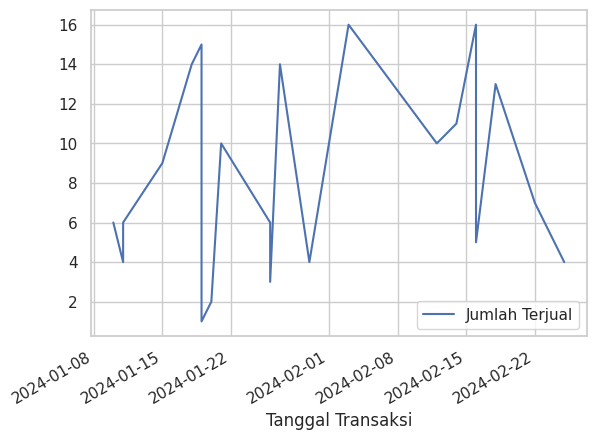

In [ ]:
Peralatan_Rumah = daily_sales[daily_sales['Kategori Produk'].str.contains('Peralatan Rumah', case=False, regex=False)]

# Ubah tipe data kolom Jumlah Order menjadi numerik
Peralatan_Rumah['Jumlah Terjual'] = pd.to_numeric(Peralatan_Rumah['Jumlah Terjual'], errors='coerce')

# Gunakan metode .loc untuk mengubah data secara langsung
Peralatan_Rumah.loc[Peralatan_Rumah['Jumlah Terjual'].isna(), 'Jumlah Terjual'] = 5

# Buat plot garis untuk kolom Jumlah Order
Peralatan_Rumah.plot(x='Tanggal Transaksi', y='Jumlah Terjual', kind='line')
plt.show()

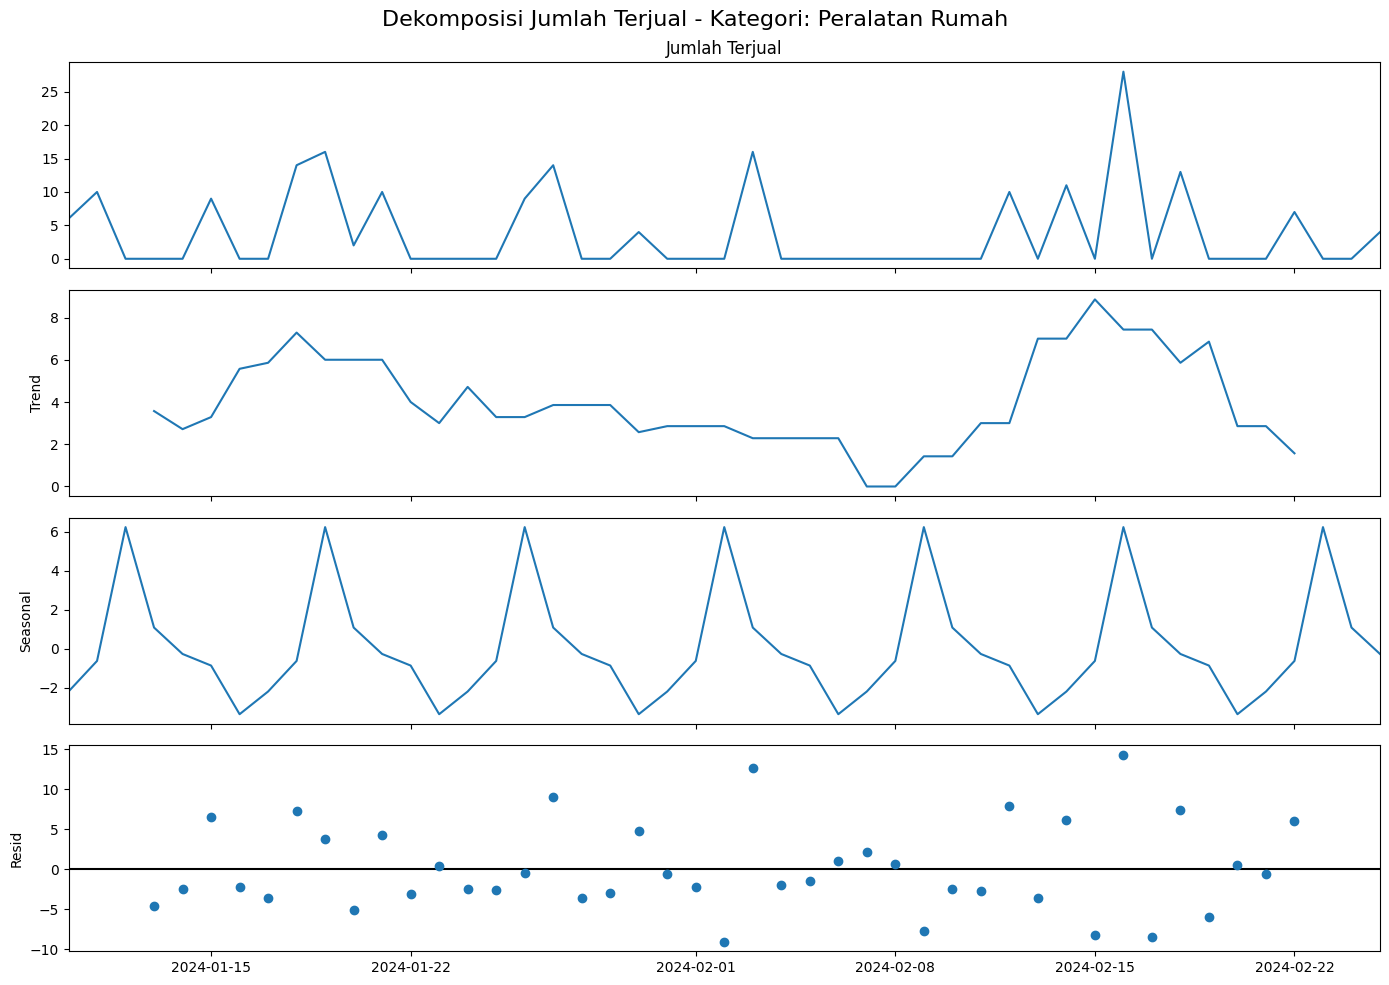

In [6]:

df_peralatan_rumah = df[df['Kategori Produk'] == 'Peralatan Rumah'].copy()

# Set index ke Tanggal Transaksi dan resample per hari
df_peralatan_rumah = df_peralatan_rumah.set_index('Tanggal Transaksi').resample('D')['Jumlah Terjual'].sum()
df_peralatan_rumah = df_peralatan_rumah.fillna(0)

# Lakukan dekomposisi time series
dekomposisi_peralatan_rumah = seasonal_decompose(df_peralatan_rumah, model='additive', period=7)

# Visualisasikan hasil dekomposisi
fig = dekomposisi_peralatan_rumah.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Dekomposisi Jumlah Terjual - Kategori: Peralatan Rumah', fontsize=16)
plt.tight_layout()
plt.show()


## **Analisis Grafik Dekomposisi Penjualan - Kategori Peralatan Rumah**

1. **Observed (Jumlah Terjual Aktual)**
* Grafik bagian atas menunjukkan fluktuasi jumlah penjualan harian selama periode pertengahan Januari hingga akhir Februari 2024.

* Penjualan tampak berfluktuasi tajam, dengan beberapa hari menunjukkan penjualan sangat rendah (bahkan nol), kemudian melonjak tajam di hari-hari tertentu.

* Lonjakan penjualan tertinggi terjadi pada sekitar 17 Februari 2024, dengan jumlah terjual lebih dari 25 unit, tertinggi dalam keseluruhan periode.

* Catatan Hari Libur Nasional:

    1. 8 Februari 2024 – Isra Mi’raj

    2. 9–10 Februari 2024 – Tahun Baru Imlek

    3. 14 Februari 2024 – Hari Pemilihan Umum

* Meskipun hari-hari tersebut merupakan hari besar nasional, tidak terlihat adanya penurunan signifikan pada grafik observed. Justru setelah periode tersebut, penjualan meningkat drastis. Hal ini menunjukkan adanya rebound atau lonjakan permintaan setelah libur.

2. **Trend (Tren Penjualan)**
* Garis tren menunjukkan pergerakan rata-rata penjualan dalam jangka waktu tertentu, yang menghaluskan fluktuasi harian. Awal Februari hingga sekitar tanggal 12 Februari, tren penjualan berada di level rendah hingga menengah.Setelah 14 Februari (hari Pemilu), tren meningkat signifikan, menunjukkan bahwa aktivitas pembelian meningkat setelah hari besar selesai.Puncak tren terjadi di sekitar 17–20 Februari, mendekati hari dengan observed tertinggi.

* **Interpretasi:**

* Penjualan produk peralatan rumah cenderung meningkat setelah libur panjang, kemungkinan karena konsumen menunda pembelian selama hari besar dan mulai belanja setelahnya.Tren ini juga bisa menunjukkan efektivitas strategi promosi pasca-libur, jika diterapkan oleh penjual.

3.**Seasonal (Pola Musiman)**
* Komponen seasonal menunjukkan pola mingguan yang berulang, artinya ada kecenderungan konsumen membeli pada hari-hari tertentu setiap minggu.Terlihat ada pola lonjakan yang konsisten di hari-hari tertentu, diikuti penurunan di hari lainnya, membentuk pola naik-turun yang berulang.

* **Interpretasi:**

* Pola ini mencerminkan perilaku belanja mingguan konsumen, mungkin lebih banyak berbelanja di awal atau pertengahan minggu. Artinya, faktor musiman (mingguan) tetap kuat meskipun terjadi libur nasional, sehingga promosi dan stok sebaiknya tetap menyesuaikan ritme mingguan ini.

4. ** Residual (Sisa/Fluktuasi Acak)**
* Komponen residual adalah bagian dari data yang tidak dapat dijelaskan oleh tren maupun seasonal, alias fluktuasi acak.Terdapat sejumlah titik residual tinggi di sekitar awal Februari hingga pertengahan Februari, serta menjelang tanggal 17 Februari. Nilai residual tinggi menunjukkan bahwa pada hari-hari tersebut terjadi penjualan yang tidak biasa atau di luar pola normal.

* **Interpretasi:**

* Fluktuasi ini bisa disebabkan oleh:

  1. Promo dadakan

  2. Flash sale

  3. Perubahan cuaca atau kebutuhan mendesak

  4. Kampanye khusus pasca-Imlek dan Pemilu


## **Kesimpulan**

* Hari besar nasional tidak selalu menurunkan penjualan. Data menunjukkan bahwa justru setelah libur seperti Imlek dan Pemilu, penjualan meningkat pesat.

* Tren meningkat setelah tanggal 14 Februari 2024, menunjukkan adanya pemulihan dan lonjakan permintaan.

* Pola musiman mingguan tetap terjaga, menandakan bahwa konsumen tetap memiliki kebiasaan belanja yang rutin meskipun ada hari libur nasional.

* Fluktuasi acak menunjukkan peluang yang bisa dimanfaatkan, seperti kampanye diskon di luar kebiasaan mingguan.

In [ ]:
# Menggunakan metode str.contains, case=False, dan regex=False
daily_sales[daily_sales['Kategori Produk'].str.contains('Makanan & Minuman', case=False, regex=False)]

,Tanggal Transaksi,Nama Produk,Kategori Produk,Harga Produk (IDR),Jumlah Terjual,Total Pendapatan (IDR),Komisi (%),Total Komisi (IDR),Nama Affiliate,Wilayah Pembeli
15,2024-01-15,Produk 39,Makanan & Minuman,561487.99,10,5614879.90,0.000102,3.222941e+05,Affiliate E,Surabaya
21,2024-01-18,Produk 41,Makanan & Minuman,1258441.36,5,6292206.80,0.000132,5.216239e+05,Affiliate B,Bandung
22,2024-01-18,Produk 42,Makanan & Minuman,165089.52,18,2971611.36,0.000283,2.499125e+05,Affiliate B,Surabaya
29,2024-01-21,Produk 16,Makanan & Minuman,1833401.26,2,3666802.52,0.000221,2.970110e+05,Affiliate C,Medan
33,2024-01-23,Produk 8,Makanan & Minuman,1111152.05,19,21111888.95,0.000073,3.259676e+06,Affiliate A,Surabaya
45,2024-01-28,Produk 50,Makanan & Minuman,528869.86,19,10048527.34,0.000138,1.388706e+06,Affiliate A,Jakarta
48,2024-01-30,Produk 48,Makanan & Minuman,920248.93,18,16564480.74,0.000037,1.012090e+06,Affiliate A,Medan
79,2024-02-20,Produk 22,Makanan & Minuman,676827.46,13,8798756.98,0.000061,4.760128e+05,Affiliate B,Jakarta
89,2024-02-26,Produk 16,Makanan & Minuman,401814.44,7,2812701.08,0.000393,3.110847e+05,Affiliate A,Bandung
95,2024-02-29,Produk 23,Makanan & Minuman,838036.39,15,12570545.85,0.000143,2.263955e+06,Affiliate D,Semarang


<ipython-input-39-4eacba27beac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Makanan_Minuman['Jumlah Terjual'] = pd.to_numeric(Makanan_Minuman['Jumlah Terjual'], errors='coerce')


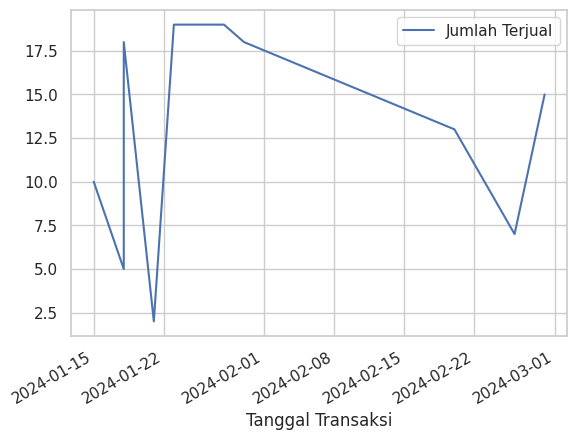

In [ ]:
Makanan_Minuman = daily_sales[daily_sales['Kategori Produk'].str.contains('Makanan & Minuman', case=False, regex=False)]

# Ubah tipe data kolom Jumlah Order menjadi numerik
Makanan_Minuman['Jumlah Terjual'] = pd.to_numeric(Makanan_Minuman['Jumlah Terjual'], errors='coerce')

# Gunakan metode .loc untuk mengubah data secara langsung
Makanan_Minuman.loc[Makanan_Minuman['Jumlah Terjual'].isna(), 'Jumlah Terjual'] = 5

# Buat plot garis untuk kolom Jumlah Order
Makanan_Minuman.plot(x='Tanggal Transaksi', y='Jumlah Terjual', kind='line')
plt.show()

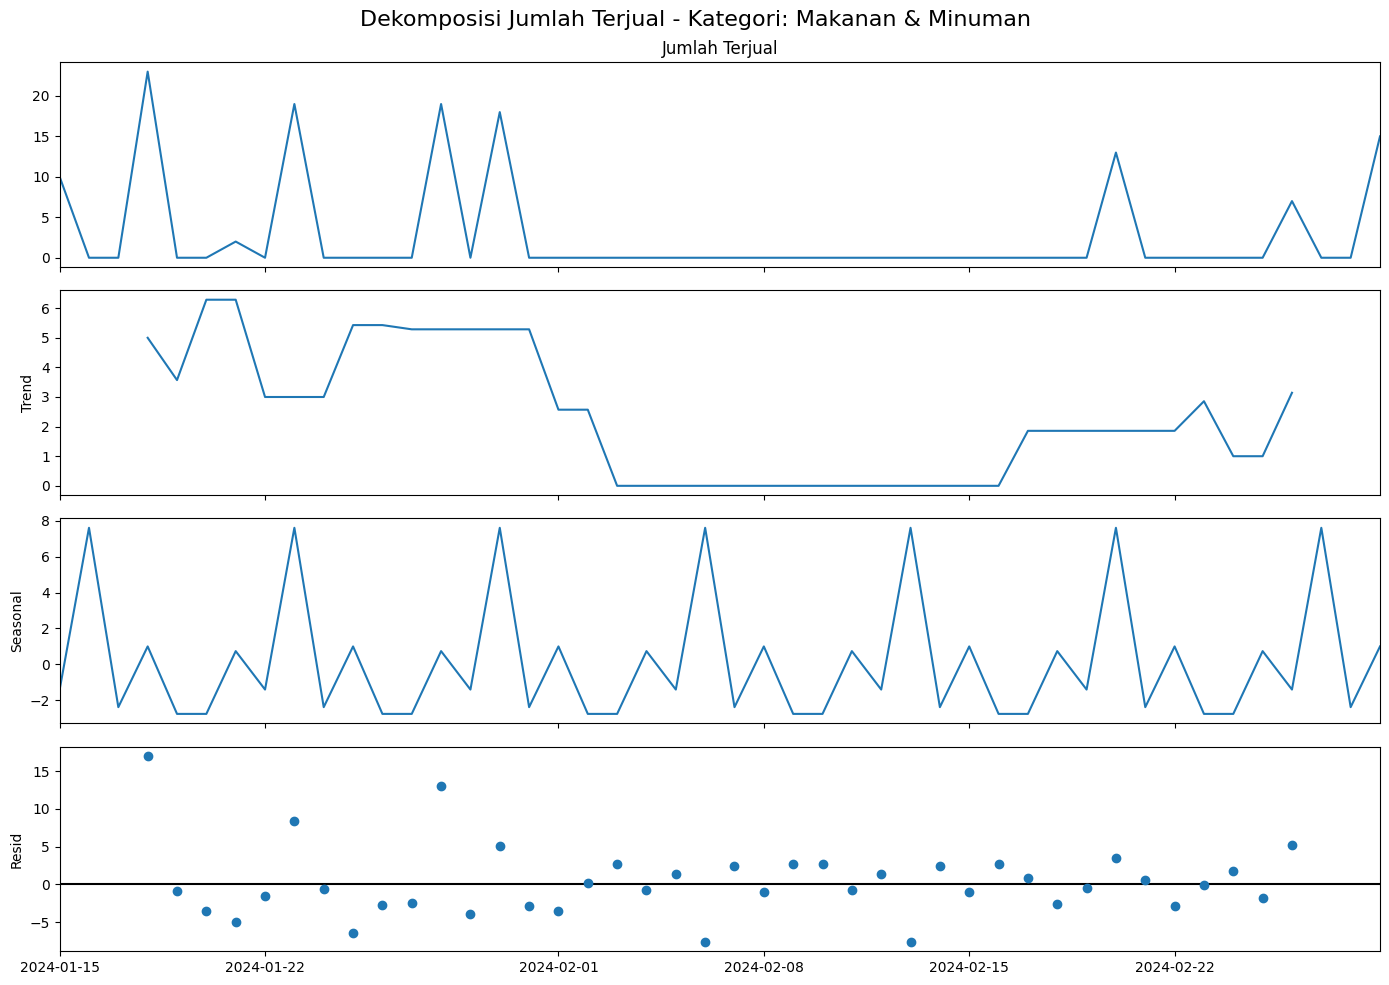

In [8]:
# Filter data untuk kategori "Makanan & Minuman"
df_makanan_minuman = df[df['Kategori Produk'] == 'Makanan & Minuman'].copy()

# Set index ke Tanggal Transaksi dan resample per hari
df_makanan_minuman = df_makanan_minuman.set_index('Tanggal Transaksi').resample('D')['Jumlah Terjual'].sum()
df_makanan_minuman = df_makanan_minuman.fillna(0)

# Lakukan dekomposisi time series
dekomposisi_makanan_minuman = seasonal_decompose(df_makanan_minuman, model='additive', period=7)

# Visualisasikan hasil dekomposisi
fig = dekomposisi_makanan_minuman.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Dekomposisi Jumlah Terjual - Kategori: Makanan & Minuman', fontsize=16)
plt.tight_layout()
plt.show()


## **Analisis Grafik Dekomposisi Penjualan - Kategori Makanan & Minuman**

1. **Komponen Observed (Jumlah Terjual Aktual)**
Pada bagian paling atas grafik terlihat bahwa penjualan mengalami fluktuasi yang signifikan, dengan beberapa puncak penjualan tinggi yang diikuti oleh penurunan tajam. Penurunan yang paling mencolok terjadi sekitar:
* 8 Februari 2024 (Isra Mi’raj)

* 9–10 Februari 2024 (Tahun Baru Imlek)

* 14 Februari 2024 (Hari Pemilihan Umum)

* Penurunan ini bukan tanpa alasan. Ketiga tanggal tersebut merupakan hari libur nasional dan momen penting di Indonesia yang memengaruhi perilaku konsumen. Aktivitas belanja online cenderung menurun karena:

* Konsumen lebih fokus pada kegiatan keagamaan dan sosial.Beberapa platform e-commerce dan logistik mungkin mengurangi operasi selama libur nasional.Prioritas belanja bergeser ke kebutuhan offline atau disesuaikan dengan kegiatan keluarga dan komunitas.

2. **Komponen Trend**
Menunjukkan penurunan yang cukup jelas selama periode hari libur. Ini memperkuat kesimpulan bahwa hari-hari besar tersebut memiliki dampak negatif terhadap tren penjualan. Setelah periode libur selesai, tren mulai menunjukkan pemulihan secara bertahap.

3. **Komponen Seasonal (Pola Musiman)**
Pola musiman tetap terlihat konsisten secara mingguan (misalnya, naik pada hari-hari tertentu dalam minggu), namun dampaknya terpotong atau terganggu oleh hari libur nasional. Artinya, meskipun biasanya ada pola pembelian yang stabil, pada periode hari besar, pola ini tidak terjadi karena gangguan eksternal.

4. **Komponen Residual (Komponen Acak/Sisa)**
Pada bagian residual, terlihat nilai-nilai ekstrem yang muncul di sekitar tanggal-tanggal hari libur. Nilai residual yang tinggi menandakan bahwa ada faktor-faktor luar biasa yang tidak bisa dijelaskan oleh tren atau pola musiman, dan ini hampir pasti berkaitan dengan peristiwa besar nasional seperti Isra Mi’raj, Imlek, dan Pemilu.

## **Kesimpulan**


1. Hari libur nasional seperti Isra Mi’raj, Tahun Baru Imlek, dan Pemilu berkontribusi terhadap penurunan penjualan kategori Makanan & Minuman.

2. Pola belanja rutin dan tren mingguan terganggu selama periode tersebut, menandakan perlunya strategi khusus untuk mengantisipasi penurunan penjualan saat hari besar berlangsung.

3. Analisis residual menunjukkan adanya pengaruh besar dari faktor eksternal, bukan dari karakteristik penjualan biasa.



# **INSIGHTS & SUMMARY ANALYSIS**

In [ ]:
# Formatter untuk jutaan
from matplotlib.ticker import FuncFormatter

def format_jutaan(x, pos):
    return f'Rp {int(x / 1_000_000):,} jt'.replace(',', '.')

def format_ribuan(x, pos):
    return f'Rp {int(x / 1_000):,} rb'.replace(',', '.')

# Pastikan kolom 'Total Pendapatan (IDR)' bertipe numerik hanya jika masih bertipe objek (string)
if df['Total Pendapatan (IDR)'].dtype == 'object':
    df['Total Pendapatan (IDR)'] = df['Total Pendapatan (IDR)'].replace('[Rp\s]', '', regex=True)
    df['Total Pendapatan (IDR)'] = df['Total Pendapatan (IDR)'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

# Komisi juga dibersihkan jika belum
if df['Total Komisi (IDR)'].dtype == 'object':
    df['Total Komisi (IDR)'] = df['Total Komisi (IDR)'].replace('[Rp\s]', '', regex=True)
    df['Total Komisi (IDR)'] = df['Total Komisi (IDR)'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

# Hitung metrik utama
penjualan_terbanyak = df.groupby('Nama Produk')['Jumlah Terjual'].sum().sort_values(ascending=False)
pendapatan_tertinggi = df.groupby('Nama Produk')['Total Pendapatan (IDR)'].sum().sort_values(ascending=False)
pendapatan_kategori = df.groupby('Kategori Produk')['Total Pendapatan (IDR)'].sum()
total_pendapatan = df['Total Pendapatan (IDR)'].sum()
total_unit = df['Jumlah Terjual'].sum()
total_komisi = df['Total Komisi (IDR)'].sum()
rata_rata_transaksi = total_pendapatan / len(df)
rata_rata_pendapatan_bulanan = monthly_total['Total Pendapatan (IDR)'].mean()
bulan_terbaik = monthly_total.loc[monthly_total['Total Pendapatan (IDR)'].idxmax()]
kategori_teratas = pendapatan_kategori.idxmax()
wilayah_teratas = revenue_by_region.idxmax()
afiliasi_teratas = top_affiliates.idxmax()
produk_terlaris = penjualan_terbanyak.idxmax()
produk_pendapatan_tertinggi = pendapatan_tertinggi.idxmax()

# Analisis pertumbuhan
bulan_positif = (monthly_total_sorted['Revenue_Growth'] > 0).sum()
bulan_negatif = (monthly_total_sorted['Revenue_Growth'] < 0).sum()
rata_rata_pertumbuhan = monthly_total_sorted['Revenue_Growth'].mean()

# Tampilkan hasil
print("🔍 IKHTISAR KINERJA BISNIS:")
print(f" Total Pendapatan: Rp {total_pendapatan:,.2f}")
print(f" Total Unit Terjual: {total_unit:,}")
print(f" Total Komisi: Rp {total_komisi:,.2f}")
print(f" Rata-rata Nilai Transaksi: Rp {rata_rata_transaksi:,.2f}")
print(f" Rata-rata Pendapatan Bulanan: Rp {rata_rata_pendapatan_bulanan:,.2f}")

print("\n🏆 PERFORMA TERBAIK:")
print(f" Bulan Terbaik: {bulan_terbaik['Year-Month']} (Rp {bulan_terbaik['Total Pendapatan (IDR)']:,.2f})")
print(f" Kategori Terlaris: {kategori_teratas} (Rp {pendapatan_kategori[kategori_teratas]:,.2f})")
print(f" Wilayah Penjualan Tertinggi: {wilayah_teratas} (Rp {revenue_by_region[wilayah_teratas]:,.2f})")
print(f" Afiliasi Terbaik: {afiliasi_teratas} (Rp {top_affiliates[afiliasi_teratas]:,.2f})")
print(f" Produk Terlaris (Jumlah): {produk_terlaris} ({penjualan_terbanyak[produk_terlaris]} unit)")
print(f" Produk Terlaris (Pendapatan): {produk_pendapatan_tertinggi} (Rp {pendapatan_tertinggi[produk_pendapatan_tertinggi]:,.2f})")

print("\n📊 ANALISIS PERTUMBUHAN:")
print(f" Bulan dengan Pertumbuhan Positif: {bulan_positif}")
print(f" Bulan dengan Pertumbuhan Negatif: {bulan_negatif}")
print(f" Rata-rata Laju Pertumbuhan: {rata_rata_pertumbuhan:.2f}%")

print("\n=== Penjualan Bulanan Semua Kategori ===")
print(f"• Total Pendapatan Seluruh Bulan: Rp {monthly_total['Total Pendapatan (IDR)'].sum():,.2f}")
print(f"• Total Unit Terjual Seluruh Bulan: {monthly_total['Jumlah Terjual'].sum():,}")
print(f"• Rata-rata Pendapatan Bulanan: Rp {monthly_total['Total Pendapatan (IDR)'].mean():,.2f}")
print(f"• Bulan dengan Pendapatan Tertinggi: {monthly_total.loc[monthly_total['Total Pendapatan (IDR)'].idxmax(), 'Year-Month']}")
print(f"• Kategori Teratas Berdasarkan Total Pendapatan: {category_summary.index[0]}")

print("\n💡 INSIGHT STRATEGIS:")

kontribusi_kategori = pendapatan_kategori / pendapatan_kategori.sum() * 100
print(f"• {kategori_teratas} mendominasi dengan kontribusi {kontribusi_kategori[kategori_teratas]:.1f}% dari total pendapatan")

kontribusi_wilayah = revenue_by_region / revenue_by_region.sum() * 100
print(f"• {wilayah_teratas} memimpin penjualan dengan pangsa pasar {kontribusi_wilayah[wilayah_teratas]:.1f}%")

produk_premium = df[df['Harga Produk (IDR)'] > df['Harga Produk (IDR)'].median()]
persen_premium = len(produk_premium) / len(df) * 100
print(f"• {persen_premium:.1f}% dari transaksi merupakan produk premium (di atas harga median)")

rata_komisi = df['Komisi (%)'].mean()
print(f"• Rata-rata komisi afiliasi: {rata_komisi:.2f}%")

# Insight musiman
df['Nama Bulan'] = df['Tanggal Transaksi'].dt.month_name()
kinerja_bulanan = df.groupby('Nama Bulan')['Total Pendapatan (IDR)'].sum().sort_values(ascending=False)
bulan_puncak = kinerja_bulanan.idxmax()
print(f"• Bulan dengan penjualan tertinggi: {bulan_puncak}")

print("\n🎯 REKOMENDASI:")
print("• Fokus strategi pemasaran pada kategori dan wilayah dengan performa tinggi")
print("• Perkuat kolaborasi dengan afiliasi terbaik")
print("• Evaluasi strategi harga untuk keseimbangan volume dan nilai")
print("• Manfaatkan tren musiman untuk perencanaan stok")
print("• Kembangkan lini produk unggulan ke wilayah yang kurang optimal")


🔍 IKHTISAR KINERJA BISNIS:
 Total Pendapatan: Rp 957,747,587.56
 Total Unit Terjual: 941
 Total Komisi: Rp 119,538,914.30
 Rata-rata Nilai Transaksi: Rp 9,577,475.88
 Rata-rata Pendapatan Bulanan: Rp 319,249,195.85

🏆 PERFORMA TERBAIK:
 Bulan Terbaik: 2024-02 (Rp 495,328,439.25)
 Kategori Terlaris: Kosmetik (Rp 212,509,623.94)
 Wilayah Penjualan Tertinggi: Medan (Rp 259,908,758.78)
 Afiliasi Terbaik: Affiliate C (Rp 236,702,707.99)
 Produk Terlaris (Jumlah): Produk 8 (51 unit)
 Produk Terlaris (Pendapatan): Produk 8 (Rp 54,731,895.69)

📊 ANALISIS PERTUMBUHAN:
 Bulan dengan Pertumbuhan Positif: 1
 Bulan dengan Pertumbuhan Negatif: 1
 Rata-rata Laju Pertumbuhan: -46.28%

=== Penjualan Bulanan Semua Kategori ===
• Total Pendapatan Seluruh Bulan: Rp 957,747,587.56
• Total Unit Terjual Seluruh Bulan: 941
• Rata-rata Pendapatan Bulanan: Rp 319,249,195.85
• Bulan dengan Pendapatan Tertinggi: 2024-02
• Kategori Teratas Berdasarkan Total Pendapatan: Kosmetik

💡 INSIGHT STRATEGIS:
• Kosmetik men

# **Forecasting Penjualan dan Pendapatan dalam 6 bulan ke depan**

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


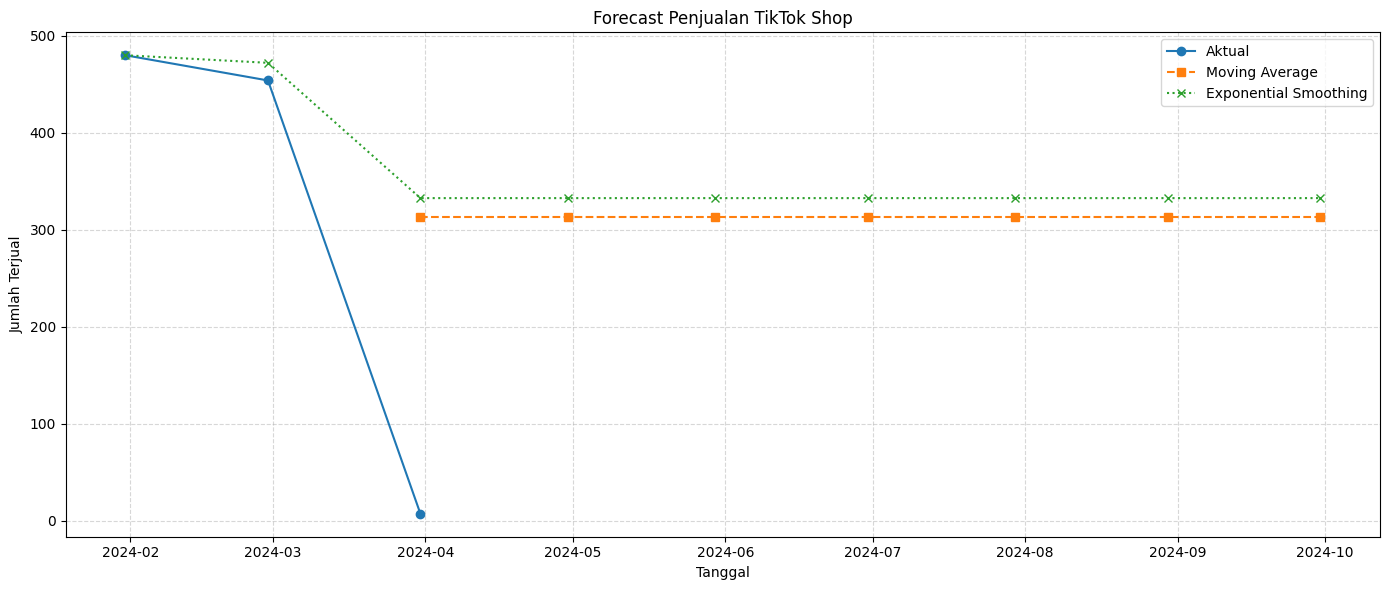

Metrik Evaluasi Model Forecasting:

MA:
  MSE: 94044.44
  MAE: 306.67
  MAPE: 4380.95%
  R2: nan

ES:
  MSE: 35457.55
  MAE: 114.61
  MAPE: 1552.00%
  R2: 0.25


Estimasi Penjualan dan Pendapatan per Kategori:
+----+-------------------+---------------+-----------------+---------------+-----------------+
|    |          Kategori |   Estimasi MA |   Pendapatan MA |   Estimasi ES |   Pendapatan ES |
+====+===================+===============+=================+===============+=================+
|  0 |         Aksesoris |           278 |   Rp328.720.432 |           295 |   Rp348.822.041 |
+----+-------------------+---------------+-----------------+---------------+-----------------+
|  1 |        Elektronik |           238 |   Rp219.601.086 |           252 |   Rp232.518.797 |
+----+-------------------+---------------+-----------------+---------------+-----------------+
|  2 |           Fashion |           336 |   Rp370.440.516 |           356 |   Rp392.490.546 |
+----+-------------------+----

In [12]:


# Fungsi format rupiah
def format_rupiah(x):
    if pd.isna(x):
        return "-"
    return "Rp{:,.0f}".format(x).replace(",", ".")

df['Tanggal Transaksi'] = pd.to_datetime(df['Tanggal Transaksi'])

# Agregasi bulanan dengan 'ME' (month end) agar tidak warning
monthly_sales = df.resample('ME', on='Tanggal Transaksi').agg({
    'Jumlah Terjual': 'sum',
    'Harga Produk (IDR)': 'mean'
}).reset_index()
monthly_sales.columns = ['Tanggal', 'Jumlah Terjual', 'Harga Rata-Rata']

# Forecasting MA & ES
df_forecast = monthly_sales.copy()
window_size = 3

# Moving Average
df_forecast['MA'] = df_forecast['Jumlah Terjual'].rolling(window=window_size).mean()

for _ in range(6):
    last_date = df_forecast['Tanggal'].iloc[-1]
    next_date = last_date + pd.DateOffset(months=1)
    recent_ma = df_forecast['MA'].dropna().iloc[-window_size:]
    ma_value = recent_ma.mean()
    avg_price = df_forecast['Harga Rata-Rata'].iloc[-window_size:].mean()
    df_forecast = pd.concat([df_forecast, pd.DataFrame({
        'Tanggal': [next_date],
        'Jumlah Terjual': [None],
        'Harga Rata-Rata': [avg_price],
        'MA': [ma_value]
    })], ignore_index=True)

# Exponential Smoothing
alpha = 0.3
df_forecast['ES'] = None
df_forecast.loc[0, 'ES'] = df_forecast.loc[0, 'Jumlah Terjual']
for i in range(1, len(df_forecast)):
    prev_es = df_forecast.loc[i - 1, 'ES']
    current = df_forecast.loc[i, 'Jumlah Terjual']
    if pd.isna(current):
        df_forecast.loc[i, 'ES'] = prev_es
    else:
        df_forecast.loc[i, 'ES'] = alpha * current + (1 - alpha) * prev_es

# Hitung metrik evaluasi hanya pada data yang ada (exclude NaN)
valid_idx_ma = df_forecast['MA'].notna() & df_forecast['Jumlah Terjual'].notna()
valid_idx_es = df_forecast['ES'].notna() & df_forecast['Jumlah Terjual'].notna()

y_true_ma = df_forecast.loc[valid_idx_ma, 'Jumlah Terjual']
y_ma = df_forecast.loc[valid_idx_ma, 'MA']

y_true_es = df_forecast.loc[valid_idx_es, 'Jumlah Terjual']
y_es = df_forecast.loc[valid_idx_es, 'ES']

metrics = {
    'MA': {
        'MSE': mean_squared_error(y_true_ma, y_ma),
        'MAE': mean_absolute_error(y_true_ma, y_ma),
        'MAPE': mean_absolute_percentage_error(y_true_ma, y_ma),
        'R2': r2_score(y_true_ma, y_ma)
    },
    'ES': {
        'MSE': mean_squared_error(y_true_es, y_es),
        'MAE': mean_absolute_error(y_true_es, y_es),
        'MAPE': mean_absolute_percentage_error(y_true_es, y_es),
        'R2': r2_score(y_true_es, y_es)
    }
}

# Visualisasi data aktual dan prediksi
plt.figure(figsize=(14, 6))
plt.plot(df_forecast['Tanggal'], df_forecast['Jumlah Terjual'], label='Aktual', marker='o')
plt.plot(df_forecast['Tanggal'], df_forecast['MA'], label='Moving Average', linestyle='--', marker='s')
plt.plot(df_forecast['Tanggal'], df_forecast['ES'], label='Exponential Smoothing', linestyle=':', marker='x')
plt.title('Forecast Penjualan TikTok Shop')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Terjual')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Tampilkan metrik evaluasi
print("Metrik Evaluasi Model Forecasting:\n")
for model in metrics:
    print(f"{model}:")
    for metrik, nilai in metrics[model].items():
        if metrik == 'MAPE':
            # Tampilkan dalam persen
            print(f"  {metrik}: {nilai*100:.2f}%")
        else:
            print(f"  {metrik}: {nilai:.2f}")
    print()


# Estimasi Pendapatan dan Penjualan per Kategori, Wilayah, Affiliate

# Ambil 6 bulan forecast terakhir
forecast_result = df_forecast.tail(6).copy()

# Total forecast jumlah terjual
total_ma_forecast = forecast_result['MA'].sum()
total_es_forecast = forecast_result['ES'].sum()

# Estimasi Penjualan per Kategori
category_distribution = df.groupby('Kategori Produk')['Jumlah Terjual'].sum() / df['Jumlah Terjual'].sum()
estimated_sales_by_category = pd.DataFrame({
    'Kategori': category_distribution.index,
    'Proporsi': category_distribution.values,
})
estimated_sales_by_category['Estimasi_MA'] = (estimated_sales_by_category['Proporsi'] * total_ma_forecast).round(0).astype(int)
estimated_sales_by_category['Estimasi_ES'] = (estimated_sales_by_category['Proporsi'] * total_es_forecast).round(0).astype(int)
avg_price_per_category = df.groupby('Kategori Produk')['Harga Produk (IDR)'].mean()
estimated_sales_by_category['Harga_Rata2'] = estimated_sales_by_category['Kategori'].map(avg_price_per_category)
estimated_sales_by_category['Pendapatan_MA'] = (estimated_sales_by_category['Estimasi_MA'] * estimated_sales_by_category['Harga_Rata2']).round(0)
estimated_sales_by_category['Pendapatan_ES'] = (estimated_sales_by_category['Estimasi_ES'] * estimated_sales_by_category['Harga_Rata2']).round(0)

# Estimasi Penjualan per Wilayah
region_distribution = df.groupby('Wilayah Pembeli')['Jumlah Terjual'].sum() / df['Jumlah Terjual'].sum()
estimated_sales_by_region = pd.DataFrame({
    'Wilayah': region_distribution.index,
    'Proporsi': region_distribution.values,
})
estimated_sales_by_region['Estimasi_MA'] = (estimated_sales_by_region['Proporsi'] * total_ma_forecast).round(0).astype(int)
estimated_sales_by_region['Estimasi_ES'] = (estimated_sales_by_region['Proporsi'] * total_es_forecast).round(0).astype(int)
avg_price_per_region = df.groupby('Wilayah Pembeli')['Harga Produk (IDR)'].mean()
estimated_sales_by_region['Harga_Rata2'] = estimated_sales_by_region['Wilayah'].map(avg_price_per_region)
estimated_sales_by_region['Pendapatan_MA'] = (estimated_sales_by_region['Estimasi_MA'] * estimated_sales_by_region['Harga_Rata2']).round(0)
estimated_sales_by_region['Pendapatan_ES'] = (estimated_sales_by_region['Estimasi_ES'] * estimated_sales_by_region['Harga_Rata2']).round(0)

# Estimasi Penjualan per Affiliate
affiliate_distribution = df.groupby('Nama Affiliate')['Jumlah Terjual'].sum() / df['Jumlah Terjual'].sum()
estimated_sales_by_affiliate = pd.DataFrame({
    'Affiliate': affiliate_distribution.index,
    'Proporsi': affiliate_distribution.values,
})
estimated_sales_by_affiliate['Estimasi_MA'] = (estimated_sales_by_affiliate['Proporsi'] * total_ma_forecast).round(0).astype(int)
estimated_sales_by_affiliate['Estimasi_ES'] = (estimated_sales_by_affiliate['Proporsi'] * total_es_forecast).round(0).astype(int)
avg_price_per_affiliate = df.groupby('Nama Affiliate')['Harga Produk (IDR)'].mean()
estimated_sales_by_affiliate['Harga_Rata2'] = estimated_sales_by_affiliate['Affiliate'].map(avg_price_per_affiliate)
estimated_sales_by_affiliate['Pendapatan_MA'] = (estimated_sales_by_affiliate['Estimasi_MA'] * estimated_sales_by_affiliate['Harga_Rata2']).round(0)
estimated_sales_by_affiliate['Pendapatan_ES'] = (estimated_sales_by_affiliate['Estimasi_ES'] * estimated_sales_by_affiliate['Harga_Rata2']).round(0)

# Format rupiah
for df_ in [estimated_sales_by_category, estimated_sales_by_region, estimated_sales_by_affiliate]:
    df_['Pendapatan_MA'] = df_['Pendapatan_MA'].apply(format_rupiah)
    df_['Pendapatan_ES'] = df_['Pendapatan_ES'].apply(format_rupiah)

# Tampilkan tabel rapi
print("\nEstimasi Penjualan dan Pendapatan per Kategori:")
print(tabulate(
    estimated_sales_by_category[['Kategori', 'Estimasi_MA', 'Pendapatan_MA', 'Estimasi_ES', 'Pendapatan_ES']],
    headers=['Kategori', 'Estimasi MA', 'Pendapatan MA', 'Estimasi ES', 'Pendapatan ES'],
    tablefmt='grid',
    stralign='right'
))

print("\nEstimasi Penjualan dan Pendapatan per Wilayah:")
print(tabulate(
    estimated_sales_by_region[['Wilayah', 'Estimasi_MA', 'Pendapatan_MA', 'Estimasi_ES', 'Pendapatan_ES']],
    headers=['Wilayah', 'Estimasi MA', 'Pendapatan MA', 'Estimasi ES', 'Pendapatan ES'],
    tablefmt='grid',
    stralign='right'
))

print("\nEstimasi Penjualan dan Pendapatan per Affiliate:")
print(tabulate(
    estimated_sales_by_affiliate[['Affiliate', 'Estimasi_MA', 'Pendapatan_MA', 'Estimasi_ES', 'Pendapatan_ES']],
    headers=['Affiliate', 'Estimasi MA', 'Pendapatan MA', 'Estimasi ES', 'Pendapatan ES'],
    tablefmt='grid',
    stralign='right'
))

# **Insight Hasil Forecasting penjualan Tiktok Shop dalam 6 Bulan kedepan**

### **Evaluasi model forecasting yang metode Moving Average (MA) dan Exponential Smoothing (ES).**

 * Model MA menunjukkan nilai Mean Squared Error (MSE) sebesar 94.044,44, yang mengindikasikan tingkat kesalahan kuadrat rata-rata yang cukup besar terhadap data aktual. Nilai Mean Absolute Error (MAE) sebesar 306,67 memperkuat bahwa prediksi model MA kurang akurat. Selain itu, nilai Mean Absolute Percentage Error (MAPE) yang sangat tinggi yaitu 4380,95% menunjukkan kesalahan persentase yang signifikan sehingga model MA kurang dapat diandalkan. R² atau koefisien determinasi model ini tidak dapat dihitung secara valid (NaN), menandakan bahwa model MA gagal menjelaskan variasi data penjualan historis.

* Sebaliknya, model Exponential Smoothing (ES) memberikan hasil yang lebih baik dengan nilai MSE sebesar 35.457,55, jauh lebih rendah dibandingkan MA, yang berarti kesalahan kuadratnya lebih kecil. MAE pada model ES juga lebih kecil yaitu 114,61, menunjukkan prediksi yang lebih dekat dengan data aktual. Meskipun nilai MAPE sebesar 1552,00% masih tergolong tinggi, namun jauh lebih rendah dibandingkan model MA, yang menandakan peningkatan akurasi dalam memprediksi penjualan. Nilai R² sebesar 0,25 menunjukkan bahwa model ES mampu menjelaskan sekitar 25% variasi dalam data penjualan, sehingga meskipun tidak sempurna, model ini memiliki kemampuan prediksi yang lebih baik dibandingkan dengan model MA.

### **Analisis Estimasi Penjualan dan Pendapatan**

1. **Berdasarkan Kategori Produk**
* Estimasi penjualan dan pendapatan menunjukkan bahwa metode Exponential Smoothing (ES) memberikan hasil yang lebih tinggi dibandingkan metode Moving Average (MA) pada semua kategori. Hal ini mencerminkan keunggulan ES dalam menangkap tren data penjualan yang bersifat fluktuatif.

* Kategori Kosmetik diproyeksikan memiliki penjualan tertinggi dengan 437 unit dan estimasi pendapatan sebesar Rp426.753.594, diikuti oleh Peralatan Rumah Tangga dengan penjualan 388 unit dan pendapatan Rp422.011.013. Fashion juga menunjukkan potensi yang kuat dengan estimasi penjualan 356 unit dan pendapatan Rp392.490.546.

* Sementara itu, kategori dengan estimasi penjualan dan pendapatan terendah adalah Makanan & Minuman dan Elektronik, masing-masing dengan 267 unit (Rp221.486.359) dan 252 unit (Rp232.518.797). Meski lebih rendah, kategori ini tetap menyumbang pendapatan yang signifikan dan dapat dioptimalkan dengan strategi pemasaran yang lebih tepat sasaran.

2. **Berdasarkan Wilayah**
* Dari sisi wilayah, Medan menjadi kontributor terbesar dengan estimasi penjualan sebesar 464 unit dan pendapatan Rp563.737.766. Disusul oleh Surabaya (431 unit, Rp424.942.650) dan Makassar (316 unit, Rp295.295.022). Ketiga wilayah ini menunjukkan potensi pasar yang besar dan dapat menjadi fokus utama distribusi serta kampanye promosi.

* Bandung dan Jakarta berada di posisi tengah dengan pendapatan sekitar Rp292 juta dan Rp245 juta secara berturut-turut. Sementara itu, Semarang memiliki estimasi penjualan paling rendah, yakni 212 unit dengan pendapatan Rp239.074.860. Meskipun demikian, wilayah ini tetap layak dipertimbangkan sebagai target ekspansi dengan pendekatan yang lebih intensif.

3. **Berdasarkan Affiliate**
* Dari sisi afiliasi, Affiliate B mendominasi performa dengan estimasi penjualan sebesar 530 unit dan pendapatan Rp531.851.251, diikuti oleh Affiliate C dengan 433 unit (Rp514.561.324). Keduanya berperan sebagai mitra strategis utama dalam meningkatkan penjualan.

* Affiliate A dan E berada di posisi menengah, dengan kontribusi pendapatan masing-masing sebesar Rp362.063.721 dan Rp342.198.672. Sedangkan Affiliate D memiliki estimasi paling rendah, yaitu 316 unit dan pendapatan Rp302.150.972, sehingga perlu ditinjau lebih lanjut untuk peningkatan performa, misalnya melalui pelatihan atau insentif tambahan.


## **Kesimpulan**

1. Model Exponential Smoothing (ES) terbukti lebih unggul dibandingkan Moving Average (MA) dalam memprediksi penjualan, dengan tingkat kesalahan yang lebih rendah dan kemampuan menjelaskan variasi data yang lebih baik. Meskipun nilai kesalahan persentase (MAPE) masih tergolong tinggi, ES menunjukkan potensi yang lebih handal untuk perencanaan penjualan.

2. Analisis estimasi penjualan dan pendapatan mengungkapkan bahwa kategori Kosmetik dan Peralatan Rumah Tangga menjadi kontributor utama pendapatan, sementara wilayah Medan dan Surabaya menunjukkan potensi pasar terbesar. Dari sisi afiliasi, Affiliate B dan C tampil sebagai mitra dengan performa penjualan tertinggi, yang dapat dijadikan fokus penguatan kemitraan.

3. Rekomendasi strategis meliputi pengoptimalan kategori produk dengan potensi rendah melalui strategi pemasaran yang lebih efektif, fokus pengembangan pasar pada wilayah dengan kontribusi tinggi, serta peningkatan dukungan bagi afiliasi dengan performa rendah untuk memaksimalkan hasil penjualan secara keseluruhan.



## **Strategis & Rekomendasi**
1. Optimasi Produk dengan Potensi Rendah
Kategori seperti Makanan & Minuman serta Elektronik perlu mendapatkan perhatian lebih melalui kampanye pemasaran yang lebih kreatif dan penawaran khusus (promo, diskon, bundling) agar dapat meningkatkan penjualan dan kontribusinya terhadap pendapatan.

2. Fokus Pengembangan Wilayah Potensial
Wilayah Medan, Surabaya, dan Makassar memiliki estimasi penjualan dan pendapatan tertinggi, sehingga perlu diperkuat distribusi produk dan aktivitas promosi di daerah tersebut. Investasi pada logistik, iklan lokal, dan kerjasama dengan mitra lokal dapat memperluas pangsa pasar.

3. Penguatan Kemitraan dengan Affiliate Unggulan
Affiliate B dan C yang memiliki performa penjualan terbaik harus terus didukung melalui insentif menarik, pelatihan penjualan, dan kolaborasi pemasaran bersama. Hal ini dapat memacu motivasi dan meningkatkan produktivitas afiliasi tersebut.

4. Peningkatan Performa Affiliate yang Kurang Optimal
Untuk Affiliate D yang memiliki estimasi penjualan terendah, perlu dilakukan evaluasi menyeluruh dan pengembangan kapasitas, misalnya melalui pelatihan keterampilan pemasaran digital, penyediaan materi promosi, dan program insentif khusus agar performanya meningkat.

5. Pemanfaatan Model Prediksi Exponential Smoothing
Karena ES menunjukkan hasil prediksi yang lebih akurat, model ini sebaiknya dijadikan dasar dalam perencanaan stok dan pengambilan keputusan bisnis agar perusahaan dapat mengantisipasi permintaan dengan lebih tepat dan menghindari overstock atau kekurangan stok.

6. Monitoring dan Evaluasi Berkala
Lakukan pemantauan dan evaluasi secara rutin terhadap hasil penjualan, performa afiliasi, dan efektivitas strategi pemasaran untuk memastikan target tercapai dan melakukan penyesuaian strategi jika diperlukan.

Strategi-strategi ini diharapkan dapat meningkatkan efektivitas operasional, memperbesar pangsa pasar, dan meningkatkan profitabilitas perusahaan secara menyeluruh.

# **Kesimpulan**
Hasil analisis menunjukkan bahwa sistem affiliate marketing di TikTok berkontribusi secara signifikan terhadap pendapatan dan penjualan, terutama pada kategori seperti Fashion dan Aksesoris. EDA memberikan wawasan yang berguna terkait distribusi pendapatan dan volume penjualan, yang dapat dijadikan dasar dalam pengambilan keputusan strategis. Dalam aspek peramalan, metode Exponential Smoothing terbukti lebih responsif terhadap perubahan tren dibandingkan Moving Average, sehingga lebih direkomendasikan untuk memproyeksikan penjualan ke depan.

Secara keseluruhan, pendekatan analitis ini menegaskan pentingnya pemanfaatan data dalam merancang strategi penjualan dan pemasaran di platform digital. Affiliate marketing bukan hanya sekadar tren, tetapi merupakan strategi berbasis performa yang dapat diukur dan ditingkatkan secara sistematis melalui analisis data dan prediksi yang akurat.